In [1]:
# https://github.com/shirsh12/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb

# **Cardiovascular_Risk**

## <b> Problem Description </b>

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.



## <b> Data Description </b>

### Demographic:

1. Sex: male or female("M" or "F")
2. Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### Behavioral

3. is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
4. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Medical( history)

5. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
6. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
7. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
8. Diabetes: whether or not the patient had diabetes (Nominal)

### Medical(current)
9. Tot Chol: total cholesterol level (Continuous)
10. Sys BP: systolic blood pressure (Continuous)
11. Dia BP: diastolic blood pressure (Continuous)
12. BMI: Body Mass Index (Continuous)
13. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
14. Glucose: glucose level (Continuous)

### Predict variable (desired target)
15. 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from scipy.stats import skew
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# **Overview of Data**

In [3]:
# loading the dataset 

df = pd.read_csv('data_cardiovascular_risk.csv', encoding= 'unicode_escape')

In [4]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
# View the data of bottom 5 rows to take a glimps of the data
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [6]:
# Shape of dataset
df.shape

(3390, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
# checking for null values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
# Checking null values in percentage
df.isnull().sum()/df.shape[0]*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [10]:
from tabulate import tabulate
data = []
for col in df.columns:
    data.append([f'{col}' , f'{(df[col] == 0).sum()}'])
print('Number of zeros in the data :-')
print(tabulate(data))

Number of zeros in the data :-
---------------  ----
id                  1
age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay       1703
BPMeds           3246
prevalentStroke  3368
prevalentHyp     2321
diabetes         3303
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD       2879
---------------  ----


In [11]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [12]:
#print the unique value
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [13]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
#print the  value of categorical data
cat_col = ['education', 'sex', 'is_smoking', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
for col in cat_col:
    print(col,':-')
    print(df[col].value_counts())
    print('--------------------------------------------')

education :-
1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
--------------------------------------------
sex :-
F    1923
M    1467
Name: sex, dtype: int64
--------------------------------------------
is_smoking :-
NO     1703
YES    1687
Name: is_smoking, dtype: int64
--------------------------------------------
BPMeds :-
0.0    3246
1.0     100
Name: BPMeds, dtype: int64
--------------------------------------------
prevalentStroke :-
0    3368
1      22
Name: prevalentStroke, dtype: int64
--------------------------------------------
prevalentHyp :-
0    2321
1    1069
Name: prevalentHyp, dtype: int64
--------------------------------------------
diabetes :-
0    3303
1      87
Name: diabetes, dtype: int64
--------------------------------------------
TenYearCHD :-
0    2879
1     511
Name: TenYearCHD, dtype: int64
--------------------------------------------


In [15]:
df.describe(include = 'all')

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

**Inferences :**

	1. No use of id column so we will drop it in feature Engg.
	2. Categorical features - Education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabeties
	3. And for some of the above features we need to do one hot or label encoding.
	4. There are some null values (302 max), which need to be dropped.
    5. No Duplicates.


# **Feature Engineeing**

In [16]:
# droping unwanted columns 
df = df.drop(["id"],axis=1)

# Droping null values
#df = df.dropna()
#df= df.reset_index(drop =True)

In [17]:
print(df.shape)
df.head()

(3390, 16)


age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

# Exploratory Data Analysis

## Univariate analysis

### Distplot

In [18]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [19]:
# Selecting column having only numbers
num_col = ['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

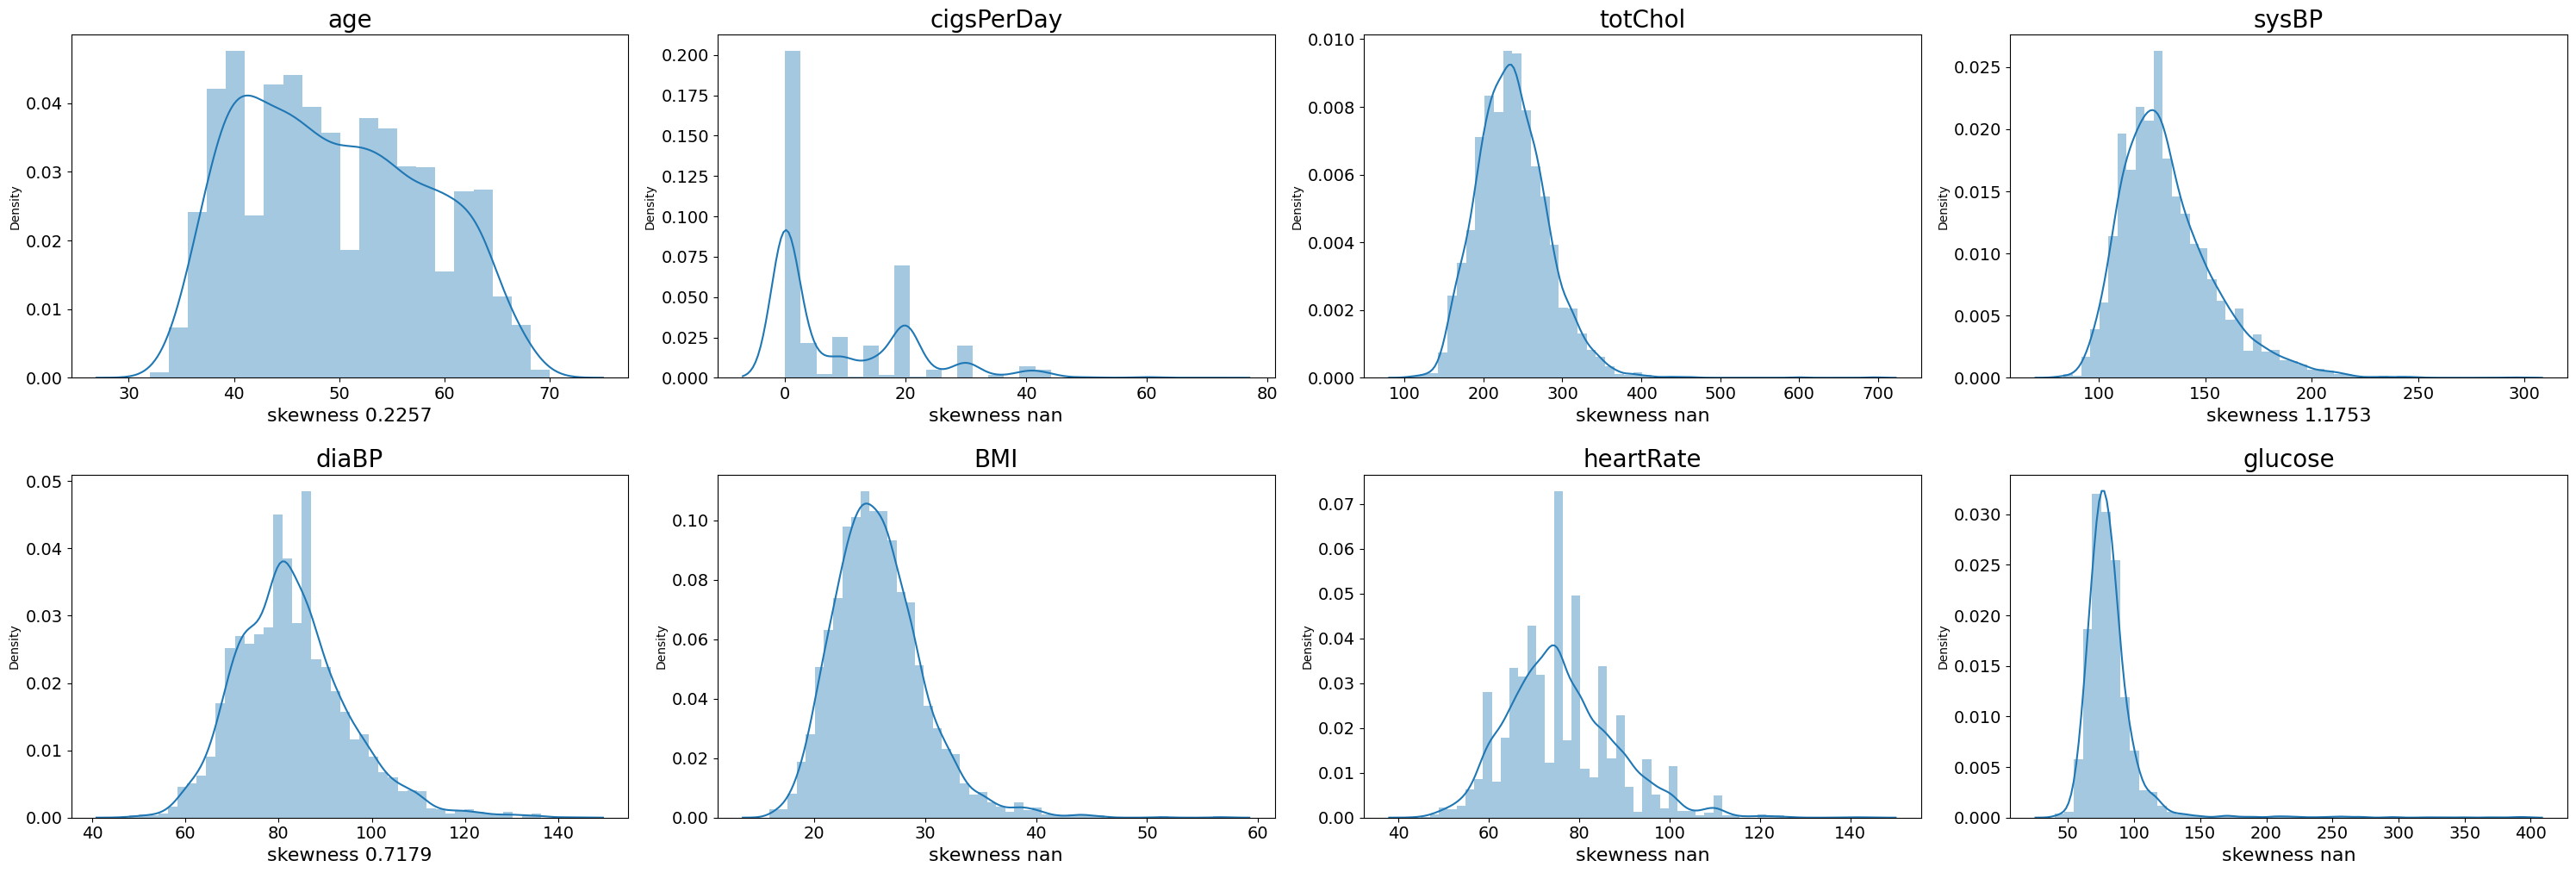

In [20]:
plt.figure(figsize=(30,25))

for n,col in enumerate(num_col):
    plt.subplot(5, 4, n+1)
    sns.distplot(df[col])
    
    # modify individual font size of elements
    plt.xlabel(f'skewness {round(skew(df[col]),4)}', fontsize=16);
    plt.title(f'{col}', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=14)

    plt.tight_layout(h_pad = 2)

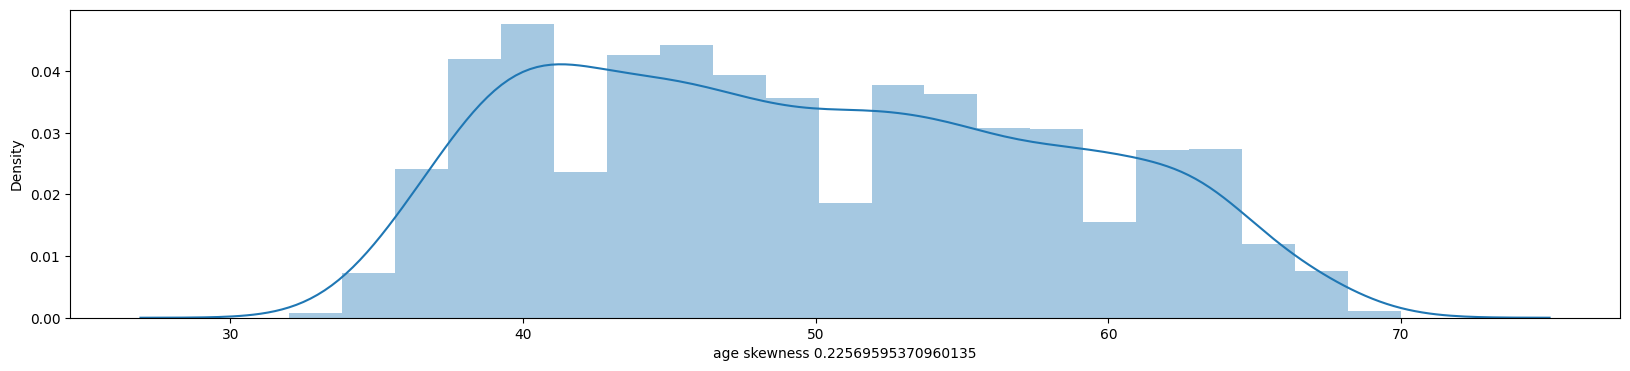

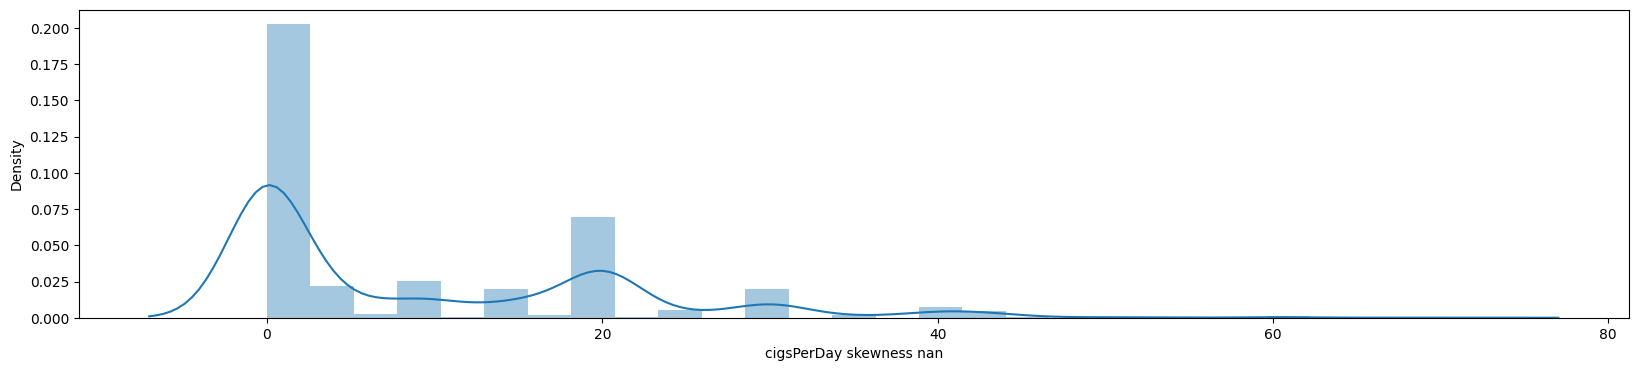

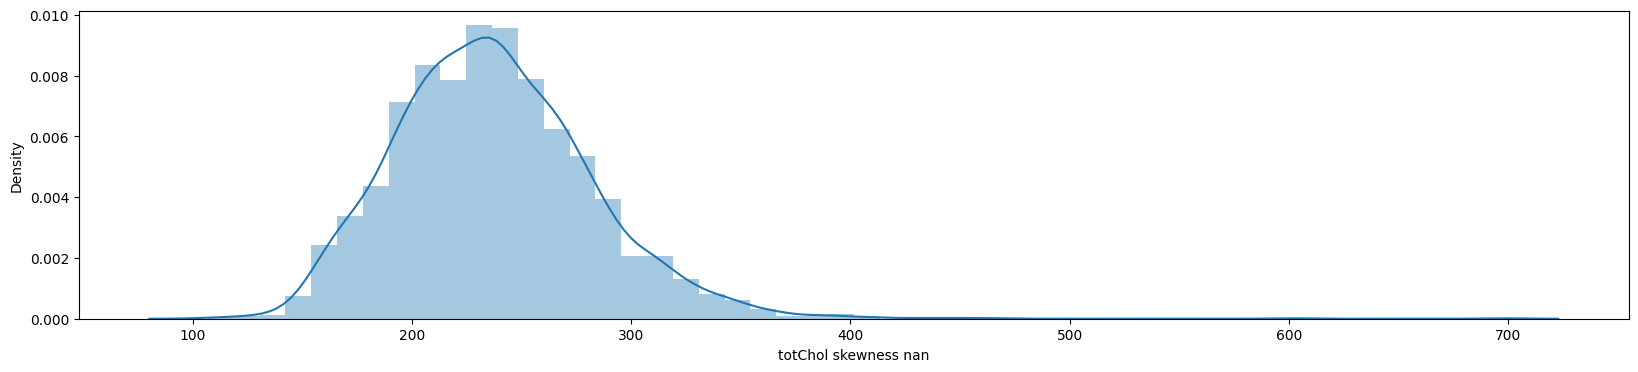

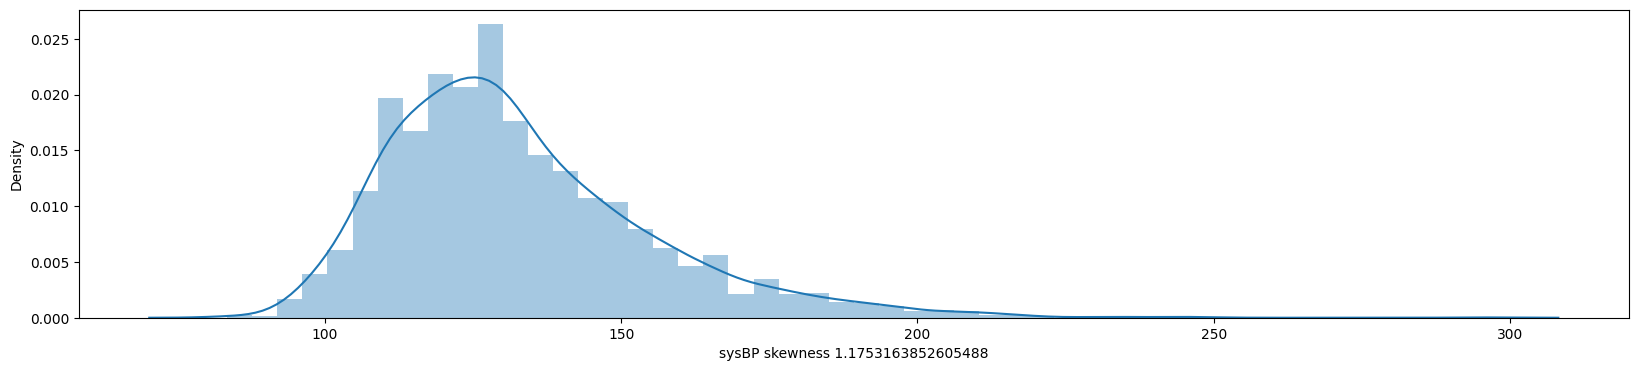

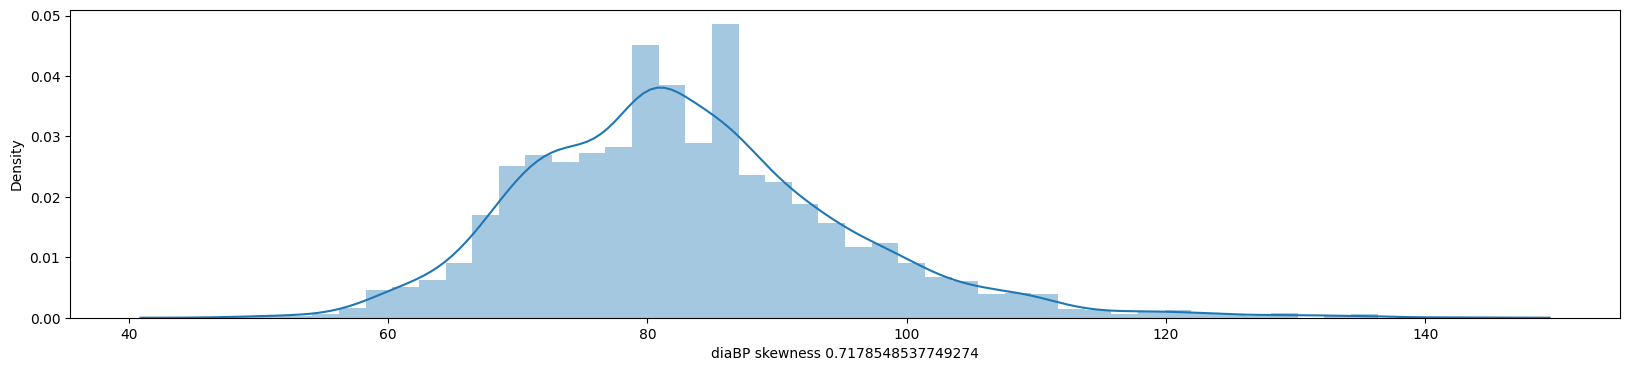

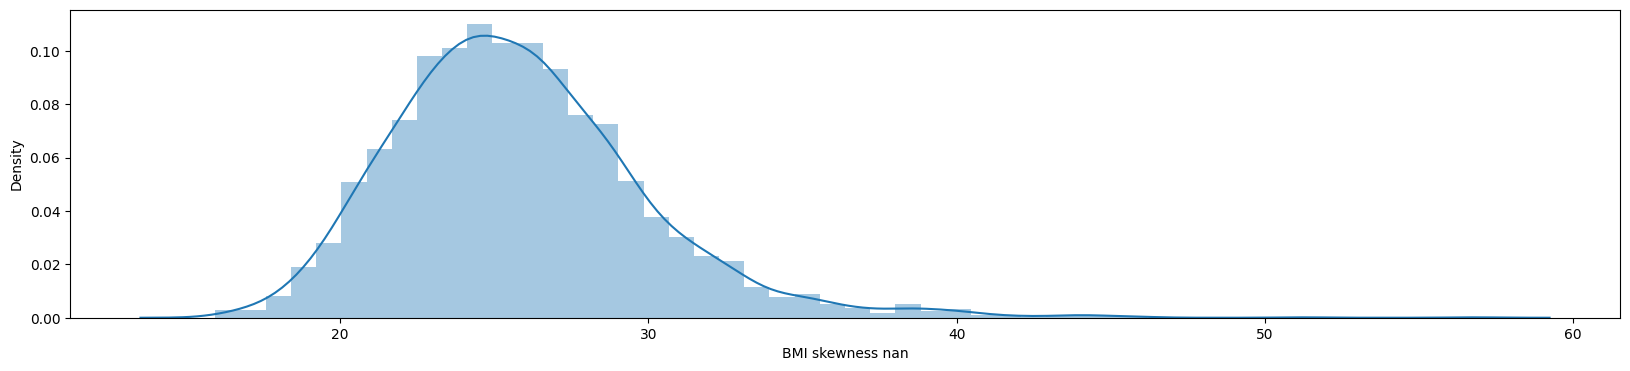

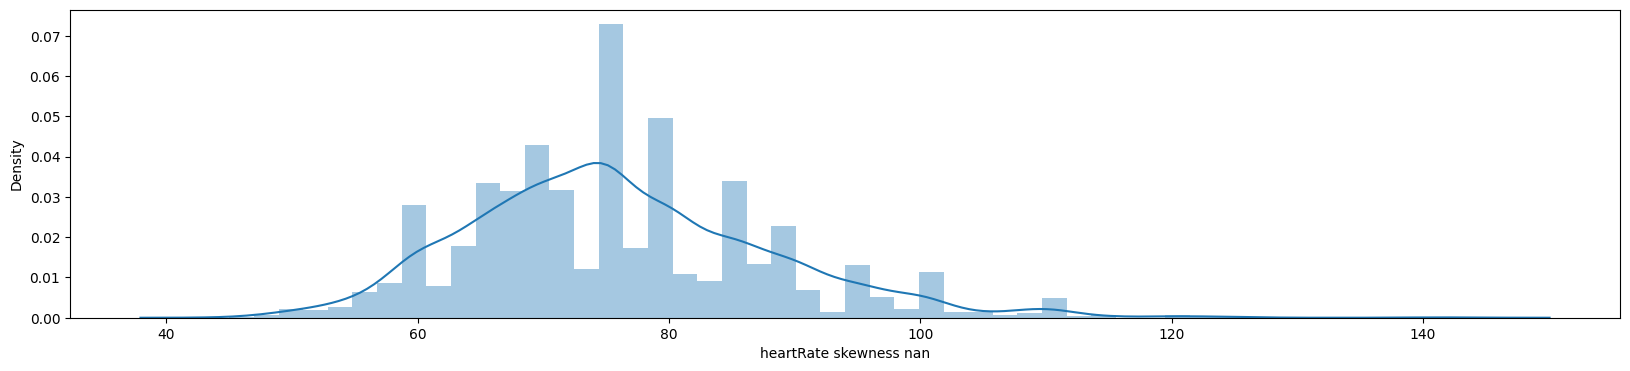

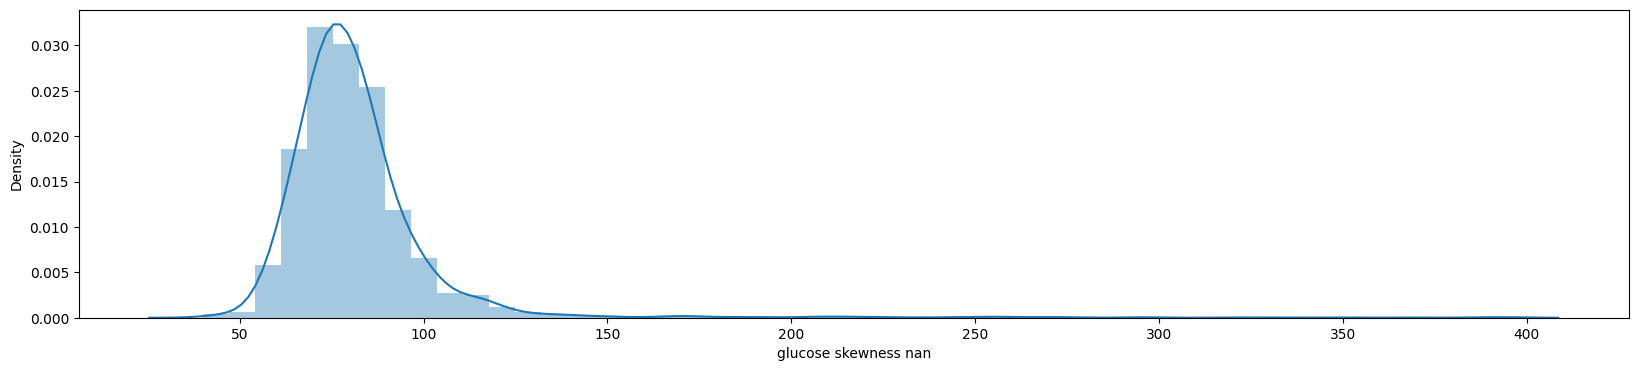

In [21]:
# Create distplot for the data
for col in num_col:
  plt.figure(figsize =(20,4))
  p = sns.distplot(df[col])
  p.set_xlabel(f'{col} skewness {skew(df[col])}')
  plt.show()
    

Inferences :- 
    
    1. From above graph we can see that some of features are highly skewed which can effect our model.
    2. First we check for outlier, if still skewness is not solved the we apply some transformation on them to normalize them.
    3. But only after cross checking it with correlation matrix, that on which feature which transformation should apply.

### Box Plot

In [22]:
cat_col = ['education', 'sex', 'is_smoking', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
num_col = ['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

In [23]:
# Function to Create boxplot for the numerical data

def box_plot(df,num_col):

    fig, axis = plt.subplots(ncols = len(num_col), nrows =1, figsize = (20, 4))
    index = 0
    axis = axis.flatten()

    #columns = num_col

    for col in num_col:
        sns.boxplot(y = col, data= df, ax = axis[index])
        index = index +1

    plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 5)

In [24]:
box_plot(df,num_col)

#### Outliers Treatment

In [25]:
# This function calculates the upper and lower whisker for each column in the input data and 
# returns a dataframe summarizing the results.

def whiskers_df(main_df,col_list):

    # This function takes data as input and gives upper and lower whisker
    def whiskers(data):
        median = np.median(data)
        upper_quartile = np.percentile(data, 75)
        lower_quartile = np.percentile(data, 25)

        # Calculation of upper and lower whisker using upper and lower quartile and IQR
        iqr = upper_quartile - lower_quartile
        upper_whisker = upper_quartile+1.5*iqr
        lower_whisker = lower_quartile-1.5*iqr
        return upper_whisker, lower_whisker
    
    # Initializing empty lists to store the results for each column
    upper_whisker = []
    lower_whisker = []
    data_above_upper_whisker = []
    data_below_lower_whisker = []
    outlier_per =[]
    indices_above_upper_whisker = []
    indices_below_lower_whisker = []
    
    # Index variable to keep track of current column iteration
    index = 0
    
    # Loop over each column in the input data
    for i in col_list:
        
        # Calculate the upper and lower whisker for current column
        upper_whisker.append(whiskers(main_df[i])[0])
        lower_whisker.append(whiskers(main_df[i])[1])
        
        # Get the indices and data of rows above upper whisker
        indices_above_upper_whisker.append(main_df.loc[main_df[i] > whiskers(main_df[i])[0]].index.tolist())
        data_above_upper_whisker.append(main_df.loc[main_df[i] > whiskers(main_df[i])[0]].shape[0])
        
        # Get the indices and data of rows below lower whisker
        indices_below_lower_whisker.append(main_df.loc[main_df[i] < whiskers(main_df[i])[1]].index.tolist())
        data_below_lower_whisker.append(main_df.loc[main_df[i] < whiskers(main_df[i])[1]].shape[0])
        
        # Calculate the percentage of outliers for current column
        outlier_per.append(round((data_above_upper_whisker[index] + data_below_lower_whisker[index])*100/df.shape[0],2))
        index = index + 1

    # Create a dataframe to store the results
    whisker_df = pd.DataFrame(
        {'feature' : col_list,
        'upper_whisker' : upper_whisker,
        'data_above_upper_whisker': data_above_upper_whisker,
        'indices_above_upper_whisker': indices_above_upper_whisker,
        'lower_whisker' : lower_whisker,
        'data_below_lower_whisker': data_below_lower_whisker,
        'indices_below_lower_whisker': indices_below_lower_whisker,
        'outlier_%' : outlier_per
    }).set_index('feature')

    print(f'Total No. of rows in dataframe - {main_df.shape[0]}')
    outlier_per = (sum(whisker_df['data_above_upper_whisker'] + whisker_df['data_below_lower_whisker'])) * 100 / main_df.shape[0]
    print(f'Percentage of total outliers in data - {round(outlier_per, 2)}%')
    display(whisker_df)
    
    return whisker_df


In [26]:
num_col = ['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

wskr_df =  whiskers_df(df,num_col)

Total No. of rows in dataframe - 3390
Percentage of total outliers in data - 4.81%


upper_whisker  data_above_upper_whisker  \
feature                                               
age                 77.00                         0   
cigsPerDay            NaN                         0   
totChol               NaN                         0   
sysBP              184.50                       105   
diaBP              113.25                        55   
BMI                   NaN                         0   
heartRate             NaN                         0   
glucose               NaN                         0   

                                  indices_above_upper_whisker  lower_whisker  \
feature                                                                        
age                                                        []          21.00   
cigsPerDay                                                 []            NaN   
totChol                                                    []            NaN   
sysBP       [6, 10, 37, 71, 163, 168, 190, 324, 359, 413, ...          76.50   
diaBP       [5, 6, 10, 14, 168, 171, 190, 324, 478, 684, 7...          51.25   
BMI                                                        []            NaN   
heartRate                                                  []            NaN   
glucose                                                    []            NaN   

            data_below_lower_whisker indices_below_lower_whisker  outlier_%  
feature                                                                      
age                                0                          []       0.00  
cigsPerDay                         0                          []       0.00  
totChol                            0                          []       0.00  
sysBP                              0                          []       3.10  
diaBP                              3           [783, 1339, 3373]       1.71  
BMI                                0                          []       0.00  
heartRate                          0                          []       0.00  
glucose                            0                          []       0.00

In [27]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def replace_with_None(test_df, outlier_df):
#    test_df = df.copy()
    for col, index_lists in zip(outlier_df.index, outlier_df['indices_above_upper_whisker']):
        for i in index_lists:
            test_df[col][i] = None
    for col, index_lists in zip(outlier_df.index, outlier_df['indices_below_lower_whisker']):
        for i in index_lists:
            test_df[col][i] = None
    return test_df

def impute_missing_values(data,column_list,n_neighbours_list,CV):
    
    # Load the dataset into a pandas DataFrame
    data = data[column_list]
    
    # Define the hyperparameters to search over
    param_grid = {
        'n_neighbors': n_neighbours_list,
        'weights': ['uniform', 'distance']
    }
    
    # Defining Scoring function for grid search cv
    def knn_imputer_mse(estimator, X):
        X_imputed = estimator.transform(X)
        return mean_squared_error(X, X_imputed)    
    
    # Create an instance of GridSearchCV
    grid_search = GridSearchCV(KNNImputer(), param_grid, cv=CV, scoring=knn_imputer_mse)
    
    # Fit the GridSearchCV object on the DataFrame
    grid_search.fit(data)
    
    # Get the best set of hyperparameters
    best_params = grid_search.best_params_
    
    # Create a new KNNImputer with the best set of hyperparameters
    imputer = KNNImputer(**best_params)
    
    # Fit the imputer on the DataFrame
    imputer.fit(data)
    
    # Use the imputer to transform the DataFrame and replace missing values
    data_imputed = pd.DataFrame(imputer.transform(data), columns=data.columns)
    print(best_params)
    return data_imputed


In [28]:
wskr_df = whiskers_df(df,num_col)

Total No. of rows in dataframe - 3390
Percentage of total outliers in data - 4.81%


upper_whisker  data_above_upper_whisker  \
feature                                               
age                 77.00                         0   
cigsPerDay            NaN                         0   
totChol               NaN                         0   
sysBP              184.50                       105   
diaBP              113.25                        55   
BMI                   NaN                         0   
heartRate             NaN                         0   
glucose               NaN                         0   

                                  indices_above_upper_whisker  lower_whisker  \
feature                                                                        
age                                                        []          21.00   
cigsPerDay                                                 []            NaN   
totChol                                                    []            NaN   
sysBP       [6, 10, 37, 71, 163, 168, 190, 324, 359, 413, ...          76.50   
diaBP       [5, 6, 10, 14, 168, 171, 190, 324, 478, 684, 7...          51.25   
BMI                                                        []            NaN   
heartRate                                                  []            NaN   
glucose                                                    []            NaN   

            data_below_lower_whisker indices_below_lower_whisker  outlier_%  
feature                                                                      
age                                0                          []       0.00  
cigsPerDay                         0                          []       0.00  
totChol                            0                          []       0.00  
sysBP                              0                          []       3.10  
diaBP                              3           [783, 1339, 3373]       1.71  
BMI                                0                          []       0.00  
heartRate                          0                          []       0.00  
glucose                            0                          []       0.00

In [29]:
df_nulls_1 = replace_with_None(df, wskr_df)
df_imputed_1 = impute_missing_values(df_nulls_1,num_col,[3,4],10)
df_imputed_1_wskr = whiskers_df(df_imputed_1,num_col)

{'n_neighbors': 3, 'weights': 'uniform'}
Total No. of rows in dataframe - 3390
Percentage of total outliers in data - 11.86%


upper_whisker  data_above_upper_whisker  \
feature                                               
age                77.000                         0   
cigsPerDay         50.000                         9   
totChol           351.000                        41   
sysBP             182.000                        11   
diaBP             110.750                        16   
BMI                35.555                        77   
heartRate         105.500                        63   
glucose           109.500                       170   

                                  indices_above_upper_whisker  lower_whisker  \
feature                                                                        
age                                                        []         21.000   
cigsPerDay   [42, 76, 482, 869, 1774, 2075, 2222, 2985, 3374]        -30.000   
totChol     [112, 194, 220, 423, 491, 512, 659, 661, 733, ...        119.000   
sysBP       [273, 505, 805, 1021, 1351, 1938, 2360, 2489, ...         78.000   
diaBP       [1019, 1134, 1150, 1300, 1306, 1508, 1639, 176...         52.750   
BMI         [14, 20, 77, 108, 119, 130, 132, 141, 163, 201...         15.515   
heartRate   [81, 116, 130, 138, 278, 287, 299, 322, 376, 4...         45.500   
glucose     [15, 77, 107, 115, 130, 134, 151, 173, 207, 21...         49.500   

            data_below_lower_whisker  \
feature                                
age                                0   
cigsPerDay                         0   
totChol                            2   
sysBP                              0   
diaBP                              2   
BMI                                0   
heartRate                          1   
glucose                           10   

                                  indices_below_lower_whisker  outlier_%  
feature                                                                   
age                                                        []       0.00  
cigsPerDay                                                 []       0.27  
totChol                                          [1708, 2231]       1.27  
sysBP                                                      []       0.32  
diaBP                                            [1829, 2034]       0.53  
BMI                                                        []       2.27  
heartRate                                               [711]       1.89  
glucose     [782, 952, 1315, 1578, 1783, 1938, 2017, 3114,...       5.31

In [30]:
df_nulls_2 = replace_with_None(df_imputed_1, df_imputed_1_wskr)
df_imputed_2 = impute_missing_values(df_nulls_2,num_col,[3,4],10)
df_imputed_2_wskr = whiskers_df(df_imputed_2,num_col)

{'n_neighbors': 3, 'weights': 'uniform'}
Total No. of rows in dataframe - 3390
Percentage of total outliers in data - 2.3%


upper_whisker  data_above_upper_whisker  \
feature                                               
age                77.000                         0   
cigsPerDay         50.000                         0   
totChol           346.000                         4   
sysBP             182.000                         0   
diaBP             110.750                         0   
BMI                35.105                        16   
heartRate         103.000                        10   
glucose           104.500                        43   

                                  indices_above_upper_whisker  lower_whisker  \
feature                                                                        
age                                                        []         21.000   
cigsPerDay                                                 []        -30.000   
totChol                                 [55, 490, 2549, 3278]        122.000   
sysBP                                                      []         78.000   
diaBP                                                      []         52.750   
BMI         [10, 245, 726, 861, 1116, 1239, 1948, 2066, 26...         15.785   
heartRate   [352, 1831, 1923, 2033, 2145, 2255, 3117, 3140...         47.000   
glucose     [59, 96, 288, 353, 361, 468, 491, 704, 825, 83...         52.500   

            data_below_lower_whisker indices_below_lower_whisker  outlier_%  
feature                                                                      
age                                0                          []       0.00  
cigsPerDay                         0                          []       0.00  
totChol                            1                      [2128]       0.15  
sysBP                              0                          []       0.00  
diaBP                              0                          []       0.00  
BMI                                0                          []       0.47  
heartRate                          0                          []       0.29  
glucose                            4      [626, 642, 1263, 1616]       1.39

In [31]:
df_nulls_3 = replace_with_None(df_imputed_2, df_imputed_2_wskr)
df_imputed_3 = impute_missing_values(df_nulls_3,num_col,[3,4],10)
df_imputed_3_wskr = whiskers_df(df_imputed_3,num_col)

{'n_neighbors': 3, 'weights': 'uniform'}
Total No. of rows in dataframe - 3390
Percentage of total outliers in data - 0.06%


upper_whisker  data_above_upper_whisker  \
feature                                               
age              77.00000                         0   
cigsPerDay       50.00000                         0   
totChol         346.00000                         0   
sysBP           182.00000                         0   
diaBP           110.75000                         0   
BMI              34.97375                         2   
heartRate       103.00000                         0   
glucose         104.50000                         0   

           indices_above_upper_whisker  lower_whisker  \
feature                                                 
age                                 []       21.00000   
cigsPerDay                          []      -30.00000   
totChol                             []      122.00000   
sysBP                               []       78.00000   
diaBP                               []       52.75000   
BMI                        [787, 1338]       15.86375   
heartRate                           []       47.00000   
glucose                             []       52.50000   

            data_below_lower_whisker indices_below_lower_whisker  outlier_%  
feature                                                                      
age                                0                          []       0.00  
cigsPerDay                         0                          []       0.00  
totChol                            0                          []       0.00  
sysBP                              0                          []       0.00  
diaBP                              0                          []       0.00  
BMI                                0                          []       0.06  
heartRate                          0                          []       0.00  
glucose                            0                          []       0.00

In [32]:
df_nulls_4 = replace_with_None(df_imputed_3, df_imputed_3_wskr)
df_imputed_4 = impute_missing_values(df_nulls_4,num_col,[3,4],10)
df_imputed_4_wskr = whiskers_df(df_imputed_4,num_col)

{'n_neighbors': 3, 'weights': 'uniform'}
Total No. of rows in dataframe - 3390
Percentage of total outliers in data - 0.03%


upper_whisker  data_above_upper_whisker  \
feature                                               
age                77.000                         0   
cigsPerDay         50.000                         0   
totChol           346.000                         0   
sysBP             182.000                         0   
diaBP             110.750                         0   
BMI                34.955                         1   
heartRate         103.000                         0   
glucose           104.500                         0   

           indices_above_upper_whisker  lower_whisker  \
feature                                                 
age                                 []         21.000   
cigsPerDay                          []        -30.000   
totChol                             []        122.000   
sysBP                               []         78.000   
diaBP                               []         52.750   
BMI                             [1505]         15.875   
heartRate                           []         47.000   
glucose                             []         52.500   

            data_below_lower_whisker indices_below_lower_whisker  outlier_%  
feature                                                                      
age                                0                          []       0.00  
cigsPerDay                         0                          []       0.00  
totChol                            0                          []       0.00  
sysBP                              0                          []       0.00  
diaBP                              0                          []       0.00  
BMI                                0                          []       0.03  
heartRate                          0                          []       0.00  
glucose                            0                          []       0.00

In [33]:
box_plot(df_imputed_4,num_col)

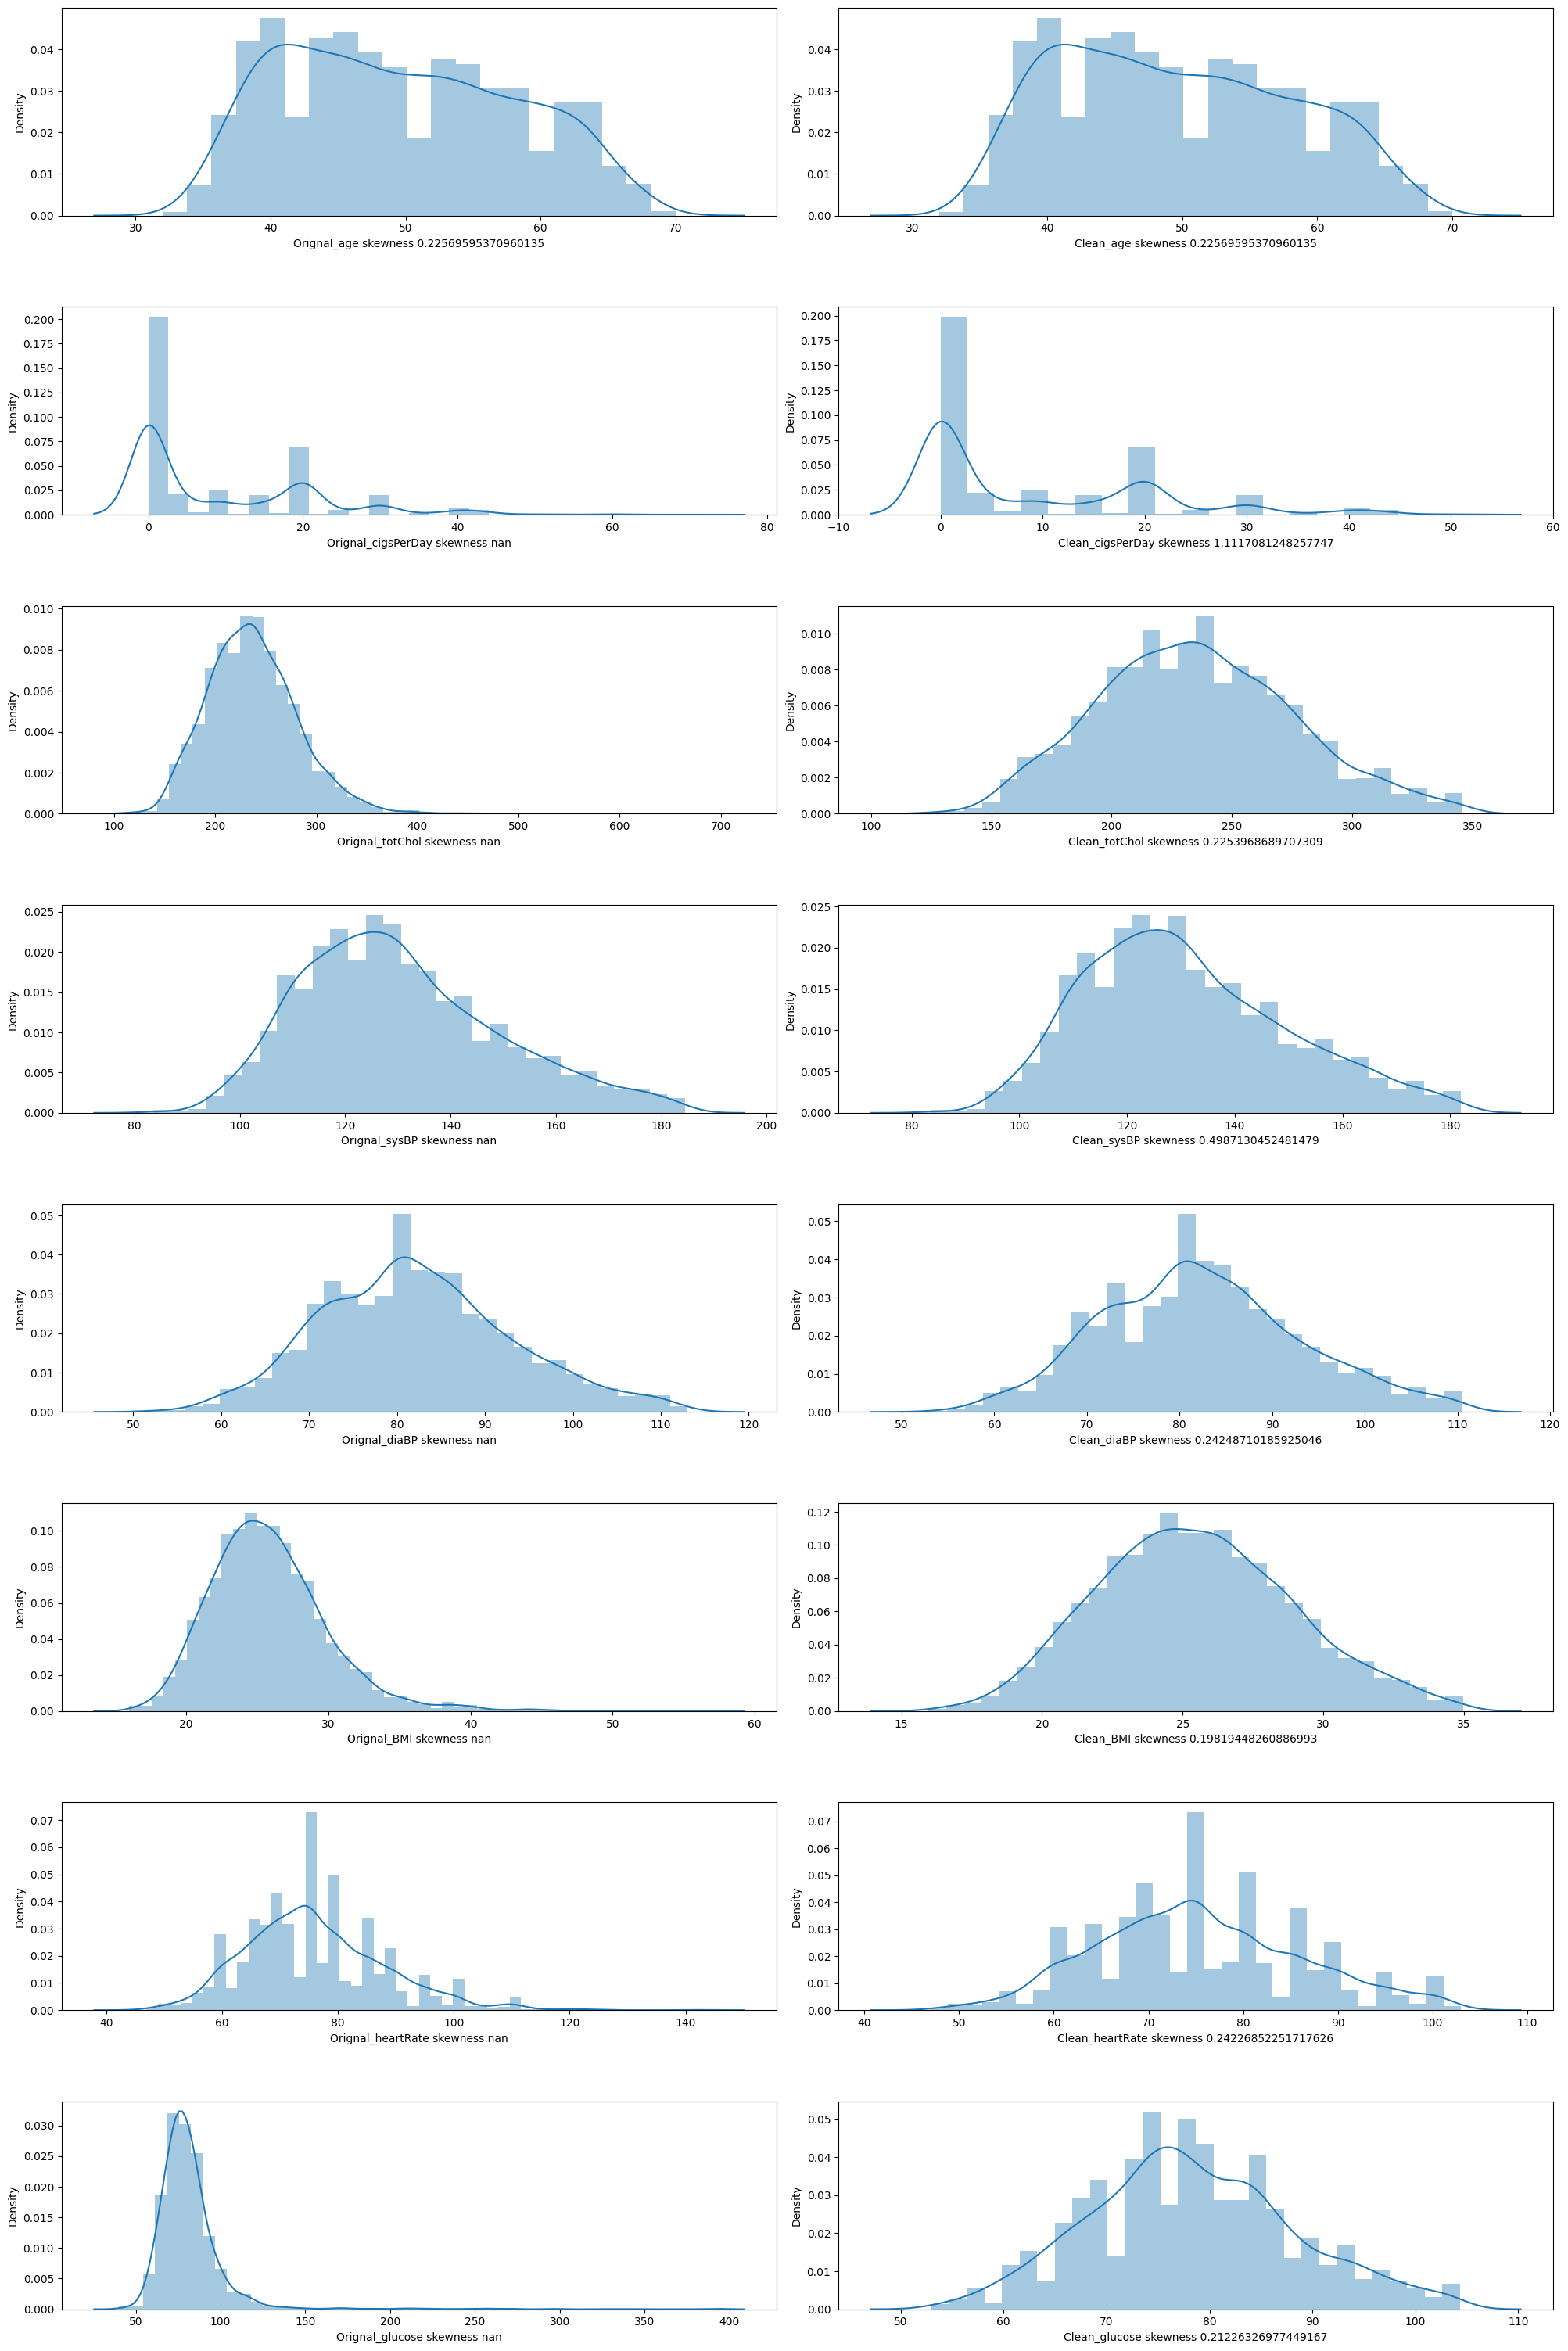

In [34]:
# Checking change in skewness before and after treating outliers
clean_df = df_imputed_4
ncol = 2
nrow = len(num_col)

fig, axis = plt.subplots(ncols = ncol, nrows =nrow, figsize = (20, 30))
index = 0
axis = axis.flatten()

for col in num_col:

  p = sns.distplot(df[col], ax = axis[index])
  p.set_xlabel(f'Orignal_{col} skewness {skew(df[col])}')
   
  index = index +1
    
  q = sns.distplot(clean_df[col], ax = axis[index])
  q.set_xlabel(f'Clean_{col} skewness {skew(clean_df[col])}')  
    
  index = index +1

plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 5)

As we can see the improvement in skewness of all the column except Cigs_per_day.

In [35]:
df_imputed_4.shape
print(df_imputed_4.isna().sum())

age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
dtype: int64


In [36]:
df.shape
print(df.isna().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP              105
diaBP               58
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [37]:
# Replaceing the num_col data with imputed data

df[num_col] = df_imputed_4[num_col]

## Bivariate

### Bar Plot

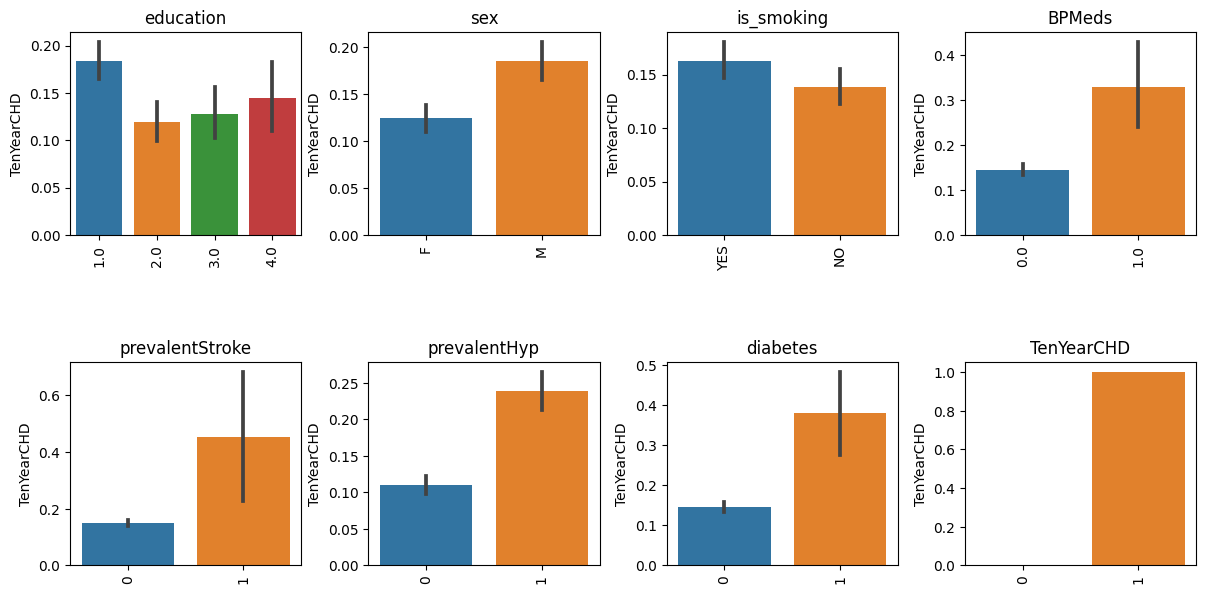

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of categorical columns to plot

# Set up the subplots with 2 columns and an appropriate height
n_cols = 4
n_rows = len(cat_col) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3*n_rows))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop over the categorical columns and plot each one
for i, col in enumerate(cat_col):
    sns.barplot(x=col, y='TenYearCHD', data=df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_xlabel('')
    axes[i].set_title(col)

# Remove any unused axes
for i in range(len(cat_col), n_rows*n_cols):
    fig.delaxes(axes[i])

# Add spacing between the subplots and display the plot
fig.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)
plt.show()


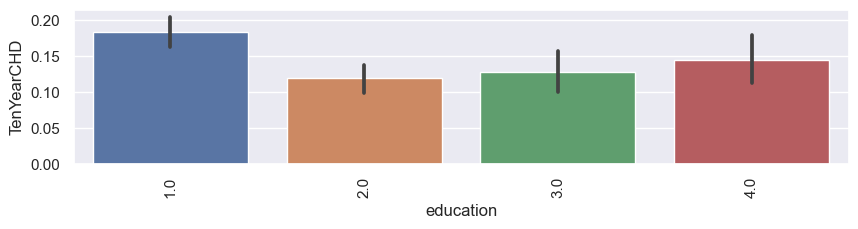

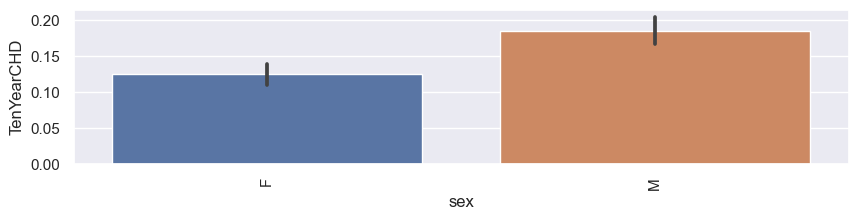

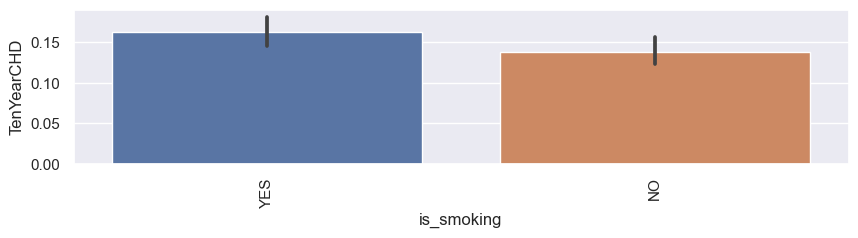

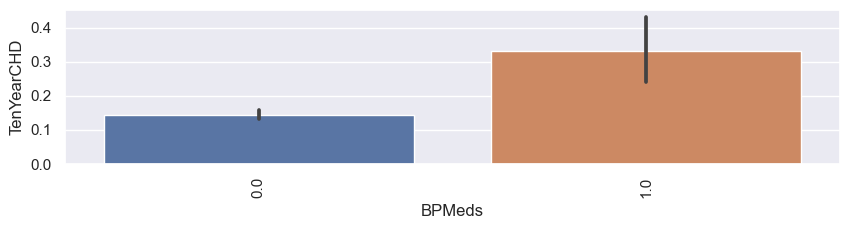

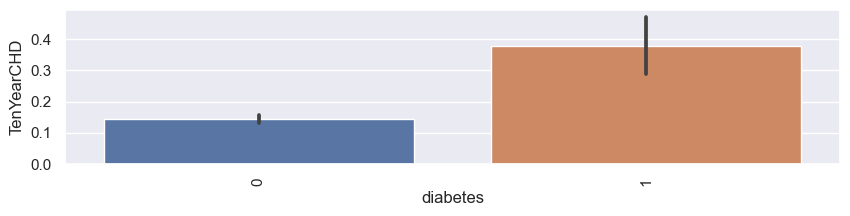

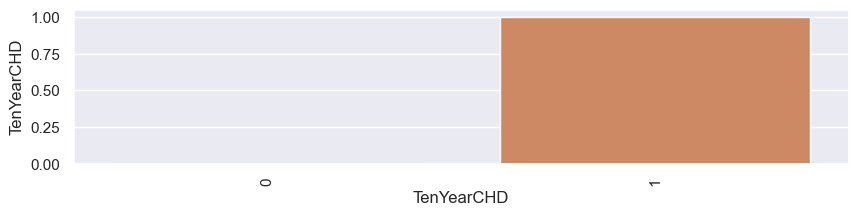

<Figure size 640x480 with 0 Axes>

In [39]:
# Create barplot for the categorical data with Rental Bike Count

for col in cat_col:
  plt.figure(figsize=(10,2))
  sns.set(font_scale=1)
  sns.barplot(x = col, y = 'TenYearCHD' , data= df)
  plt.xticks(rotation=90)
  plt.show()
plt.tight_layout(pad = 0.5, w_pad = 0.5, h_pad = 5)


Insights:- 
    
1. Less educated people have high percentage of CDH.
2. Male are more prone to CHD than female.
3. Smokers have high ratio of CHD than Non smokers.
4. Patients having BPmeds are more prone to CHD.
5. People have prevalant stroke have very high chances of CHD.
6. People have hypertension have very high chances of CHD.
7. People have diabetes have very high chances of CHD.

### Line Plot

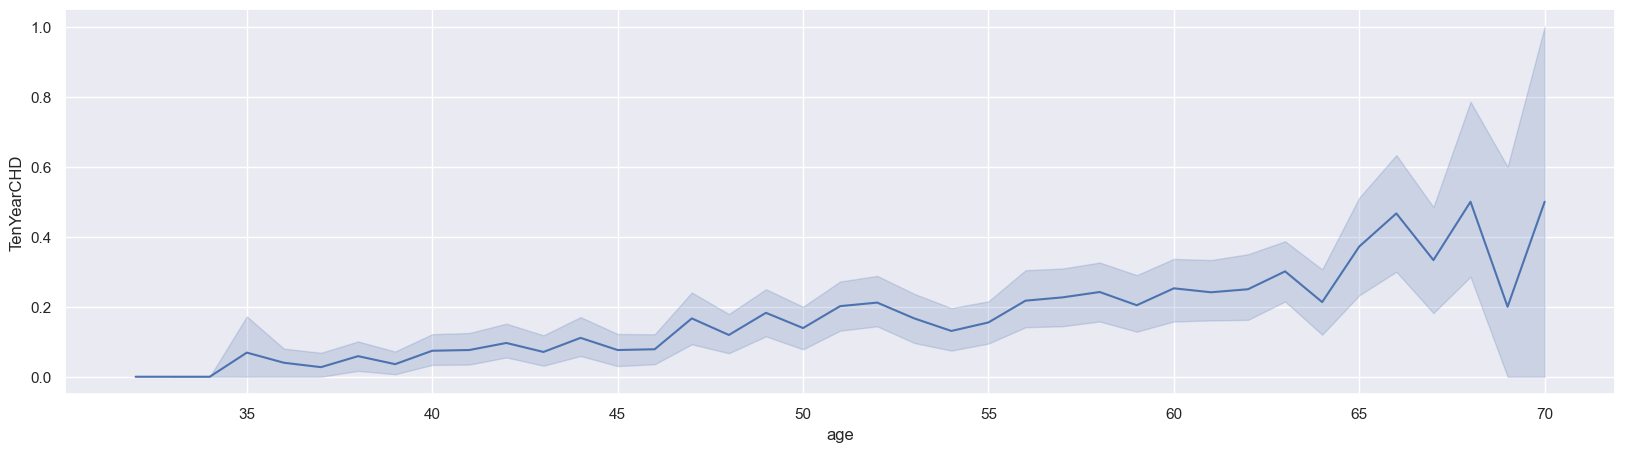

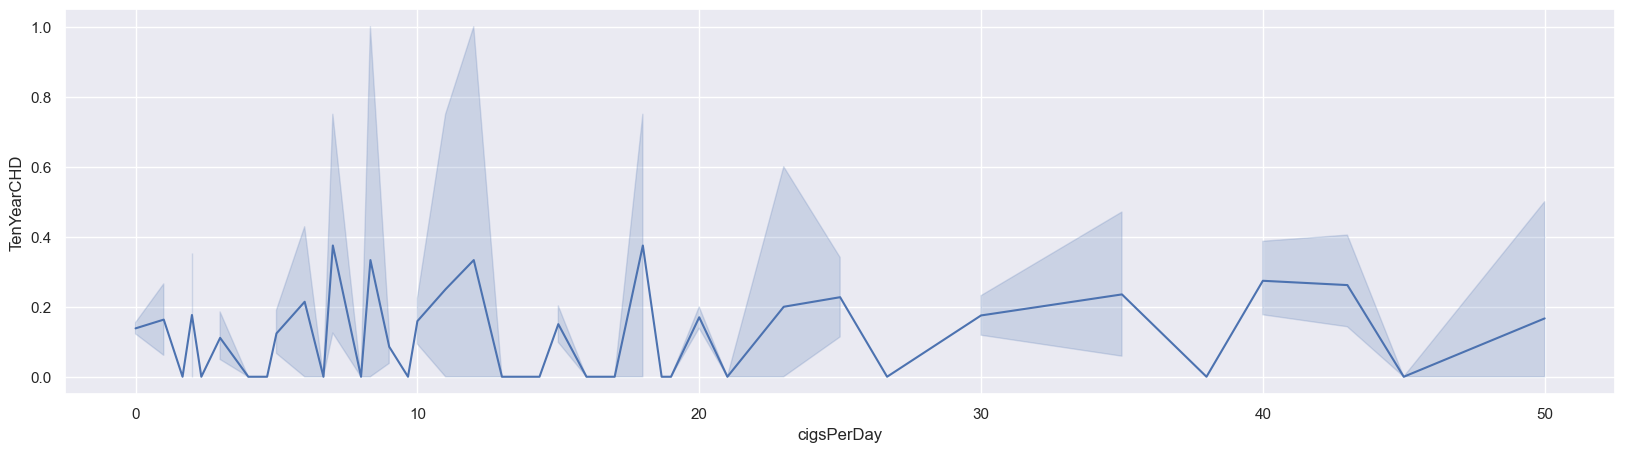

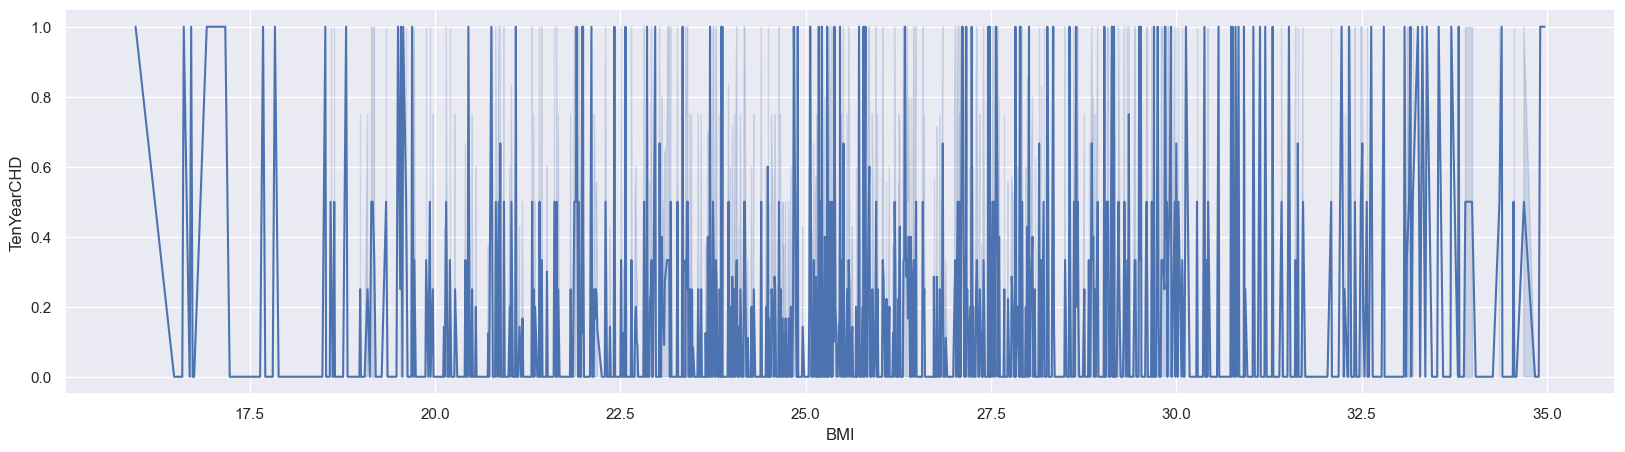

In [40]:
# for numerical columns
for i in num_col:
  plt.figure(figsize=(20,5))
  sns.lineplot(x=i,y='TenYearCHD',data=df,palette='Grouped')

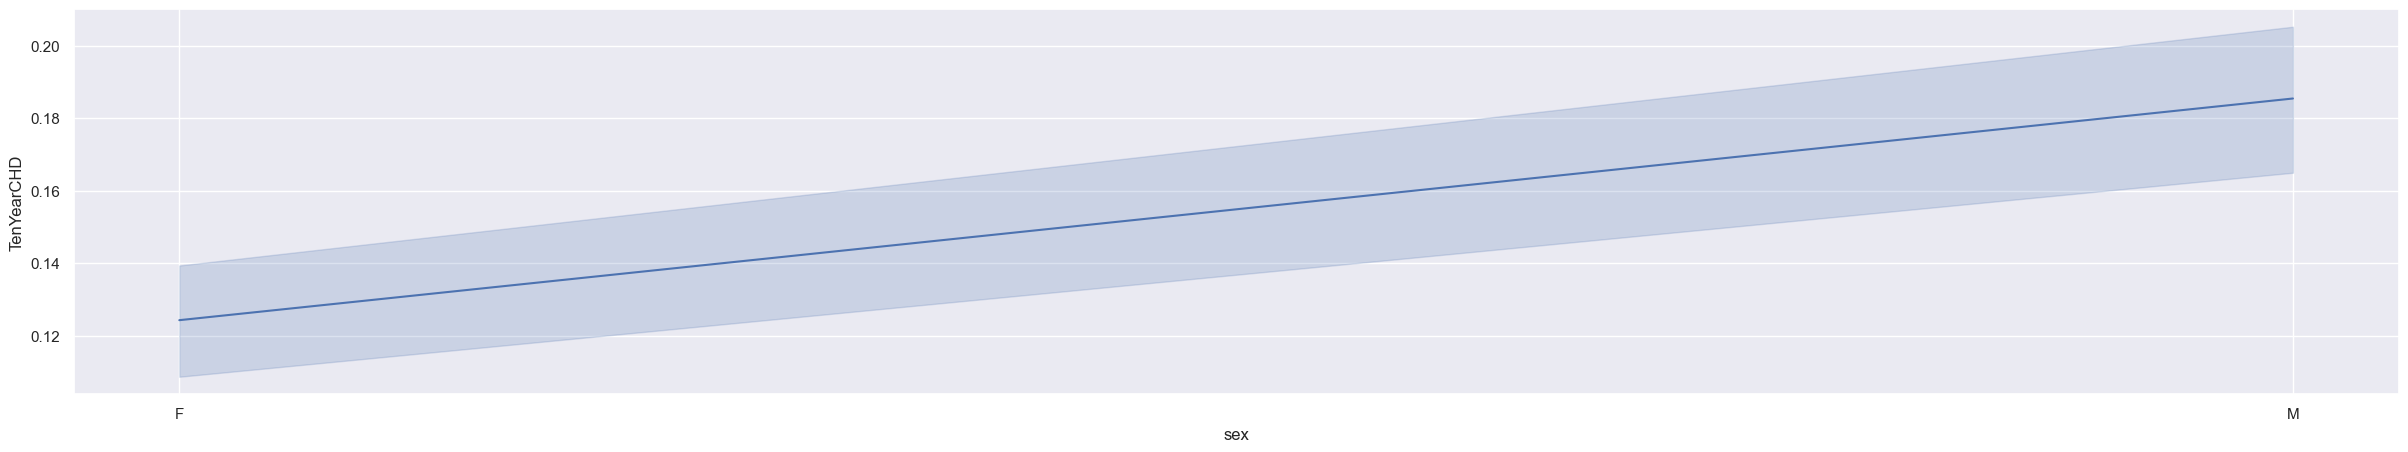

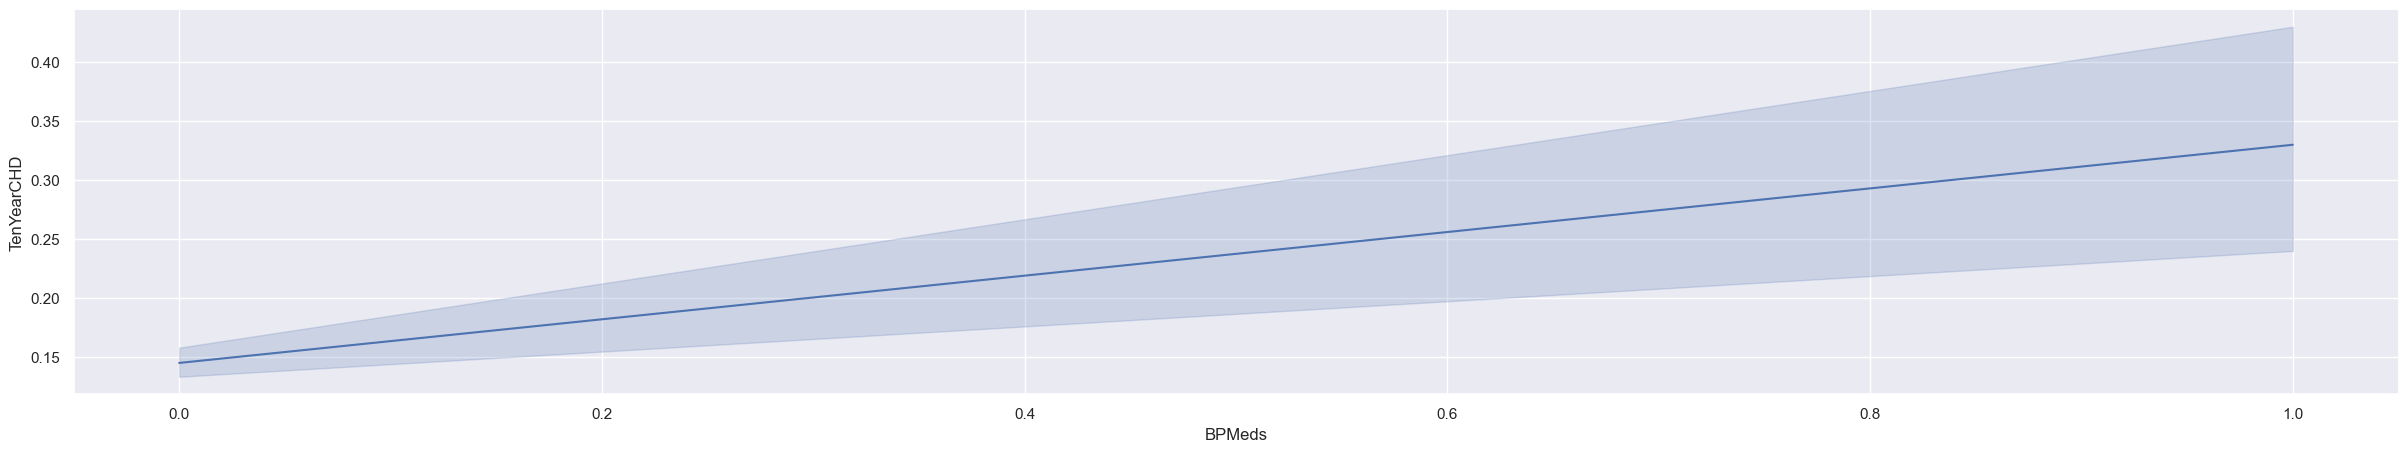

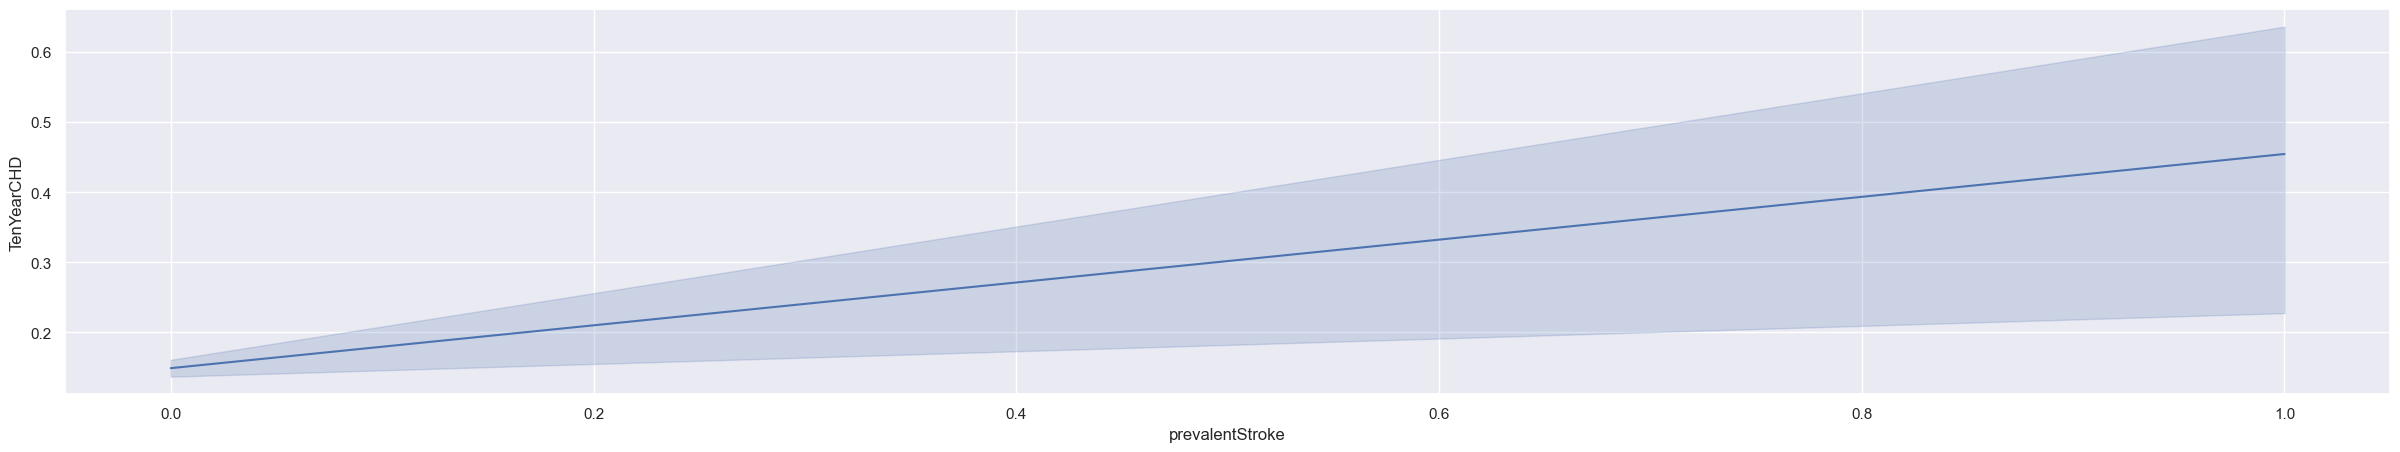

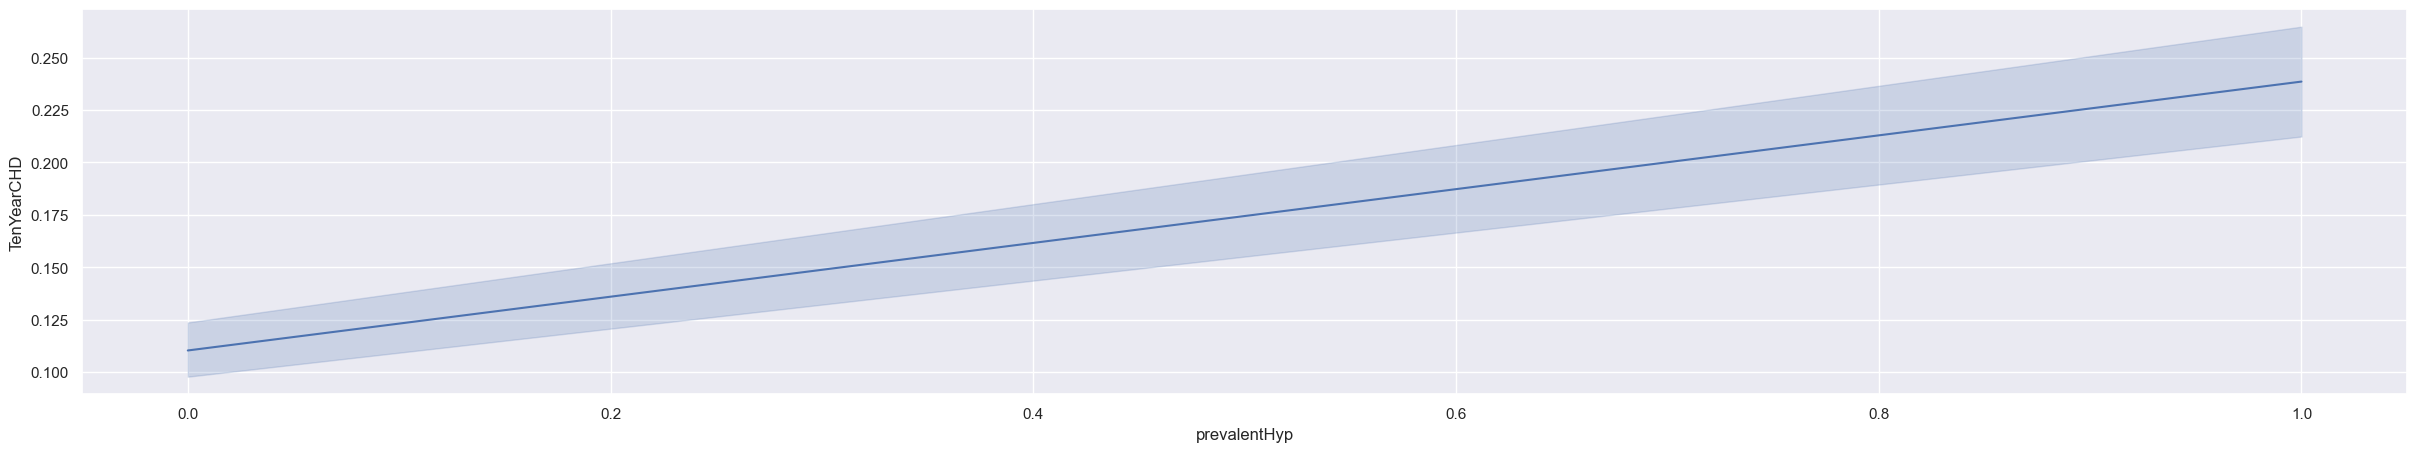

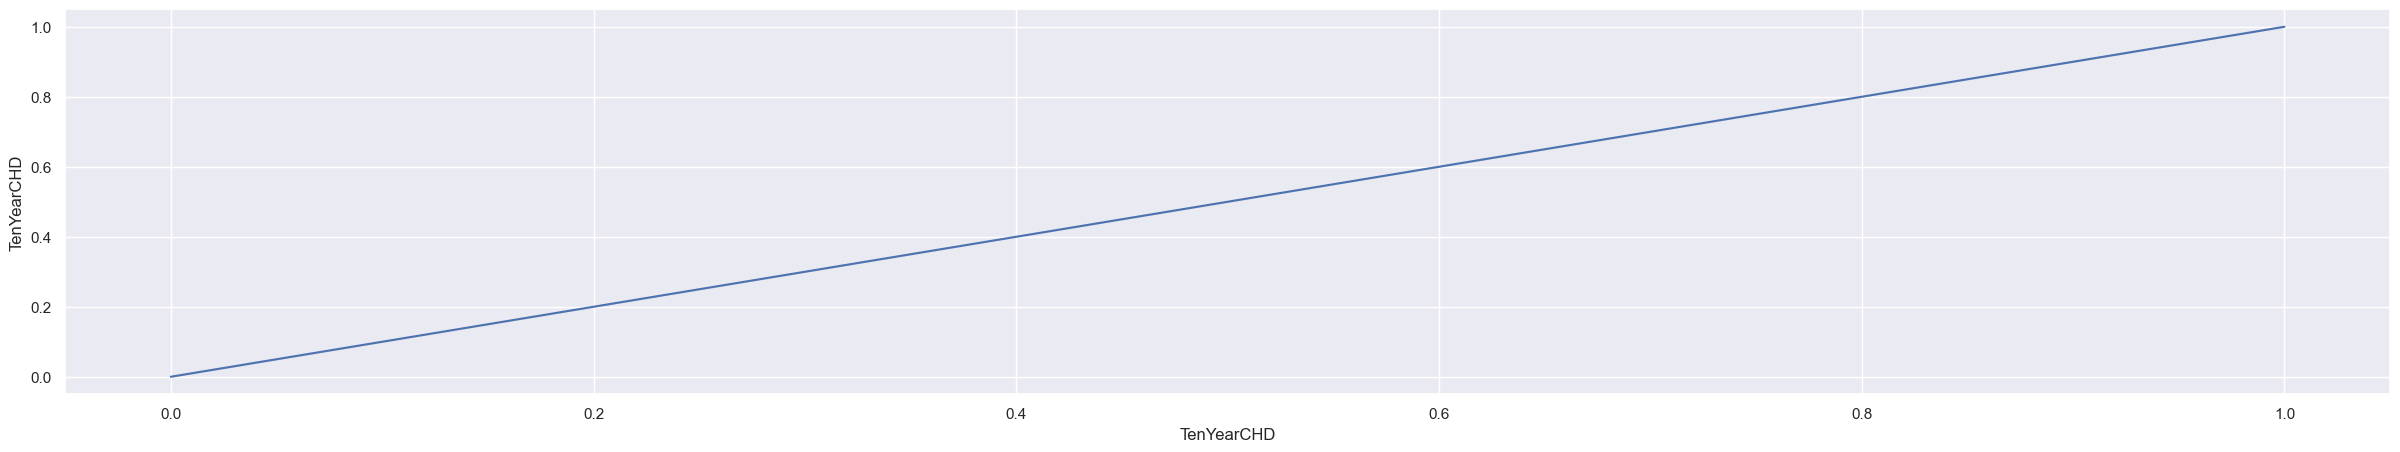

In [41]:
# for categorical columns
for i in cat_col:
  plt.figure(figsize=(30,5))
  sns.lineplot(x=i,y='TenYearCHD',data=df,palette='Grouped')

### Other plots

In [42]:
at_risk = "At risk"
no_risk= "No risk"
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g' ,kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']=="F"]
men= df[df['sex']=="M"]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[2],color='r',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[2],color='g',kde=False)
ax.legend()
ax.set_title("Male")

Text(0.5, 1.0, 'Male')

In [43]:
at_risk = "At risk"
no_risk= "No risk"
smoking= df[df['is_smoking']=="YES"]
non_smoking= df[df['is_smoking']=="NO"]
fig , axes= plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax= sns.distplot(smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[0],color='r',kde=False)
ax= sns.distplot(smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[0],color='g',kde=False)
ax.legend()
ax.set_title("Smokers")

ax= sns.distplot(non_smoking[df['TenYearCHD']==1].age,bins=18,label=at_risk,ax=axes[1],color='r',kde=False)
ax= sns.distplot(non_smoking[df['TenYearCHD']==0].age,bins=40,label=no_risk,ax=axes[1],color='g',kde=False)
ax.legend()
ax.set_title("NonSmokers")

Text(0.5, 1.0, 'NonSmokers')

INSIGHTS :
1. Both Women and Men lying in Age group of 50-52 have high risk of heart disease.
2. Men lying in age group 40-42 are at risk.
3. Men having age more than 65 are also at risk.
4. Risk is High in same age group despite they are Smokers or not.

In [44]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

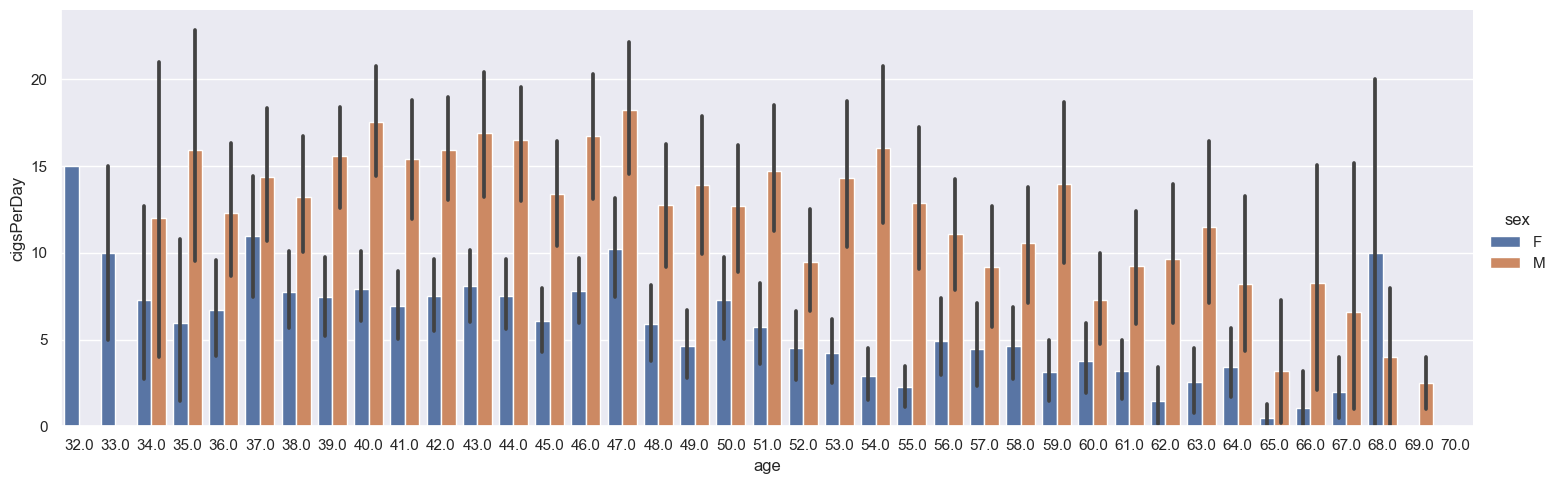

In [45]:
sns.catplot(y='cigsPerDay',x='age',kind='bar', data=df,hue='sex',aspect=3)

No. of cigrates per day is high amoung youngsters and it decreases as age increases but after 65 it increases again.

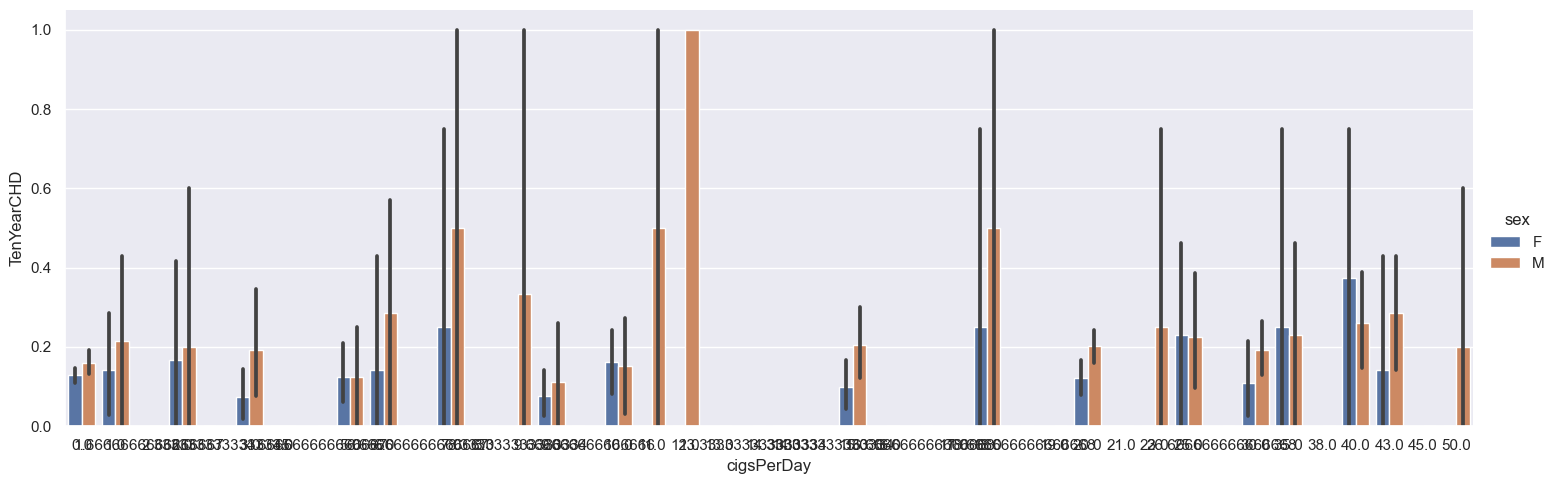

In [46]:
sns.catplot(x='cigsPerDay',y='TenYearCHD',kind='bar', data=df,hue='sex',aspect=3)
#sns.set_ylabels("RISK Probability")

## Multivariate 

### Corelation 

In [47]:
corr_mat = df.corr()

In [48]:
# heat map
plt.figure(figsize = (30,15))
sns.heatmap(corr_mat, annot = True)

<AxesSubplot: >

In [49]:
'''
# Function to find collerated data more than threshold value 

def correlation(df, threshold):
  correlated_cols = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
          colname = corr_matrix.columns[i]
          correlated_cols.add(colname)
  return correlated_cols

# Dropping highly correlated column 

corr_colmns = correlation(df, 0.6)
df.drop(corr_colmns, axis = 1, inplace = True)
print(corr_colmns)
df.columns

'''

'\n# Function to find collerated data more than threshold value \n\ndef correlation(df, threshold):\n  correlated_cols = set()\n  corr_matrix = df.corr()\n  for i in range(len(corr_matrix.columns)):\n    for j in range(i):\n      if abs(corr_matrix.iloc[i,j]) > threshold:\n          colname = corr_matrix.columns[i]\n          correlated_cols.add(colname)\n  return correlated_cols\n\n# Dropping highly correlated column \n\ncorr_colmns = correlation(df, 0.6)\ndf.drop(corr_colmns, axis = 1, inplace = True)\nprint(corr_colmns)\ndf.columns\n\n'

### Pair Plot

In [50]:
sns.pairplot(df)

## Inferences :- 

1. Due to the imbalanced nature of the data set it was difficult to make conclusions but based on what is observed but these are the conclusions that could be drawn:

2. Slightly more males are suffering from CHD than females.

3. The percentage of people who have CHD is almost equal between smokers and non smokers.

4. The percentage of people who have CHD is higher among the diabetic, and those with prevalent hypertension as compared to those who don’t have similar morbidities.

5. A larger percentage of the people who have CHD are on blood pressure medication.

6. Another interesting trend I checked for was the distribution of the ages of the people who had CHD and the number of the sick generally increased with age with the peak being at 63 years old.

In [51]:
df.shape

(3390, 16)

In [52]:
print(df.isna().sum())

age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64


In [53]:
print(df_imputed_4.isna().sum())


age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
dtype: int64


In [54]:
# Copying Clean_df data in Original df 
#df = clean_df.copy()

# Encoding

In [55]:
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0        2.0   F        YES         3.0     0.0                0   
1  36.0        4.0   M         NO         0.0     0.0                0   
2  46.0        1.0   F        YES        10.0     0.0                0   
3  50.0        1.0   M        YES        20.0     0.0                0   
4  64.0        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP        BMI  heartRate  \
0             0         0    221.0  148.0   85.0  30.913333       90.0   
1             1         0    212.0  168.0   98.0  29.770000       72.0   
2             0         0    250.0  116.0   71.0  20.350000       88.0   
3             1         0    233.0  158.0   88.0  28.260000       68.0   
4             0         0    241.0  136.5   85.0  26.420000       70.0   

   glucose  TenYearCHD  
0     80.0           1  
1     75.0           0  
2     94.0           0  
3     94.0           1  
4     77.0           0

In [56]:
df = df.dropna()
df= df.reset_index(drop =True)

In [57]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [58]:
def Data_encoding(data):
    data['sex'] = data['sex'].apply(lambda x: 1 if x == 'M' else 0)
    data['is_smoking'] = data['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)  
    data['education'] = data['education'].apply(lambda x : int(x))

Data_encoding(df)

In [59]:
# Encoding..

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)  
df['education'] = df['education'].apply(lambda x : int(x))

In [60]:
df.head(5)

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0          2    0           0         3.0     0.0                0   
1  36.0          4    0           0         0.0     0.0                0   
2  46.0          1    0           0        10.0     0.0                0   
3  50.0          1    0           0        20.0     0.0                0   
4  64.0          1    0           0        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP        BMI  heartRate  \
0             0         0    221.0  148.0   85.0  30.913333       90.0   
1             1         0    212.0  168.0   98.0  29.770000       72.0   
2             0         0    250.0  116.0   71.0  20.350000       88.0   
3             1         0    233.0  158.0   88.0  28.260000       68.0   
4             0         0    241.0  136.5   85.0  26.420000       70.0   

   glucose  TenYearCHD  
0     80.0           1  
1     75.0           0  
2     94.0           0  
3     94.0           1  
4     77.0           0

In [61]:
"""# lable encoding
le = LabelEncoder()

for col in cat_col:
    df[col]= le.fit_transform(df[col])"""

'# lable encoding\nle = LabelEncoder()\n\nfor col in cat_col:\n    df[col]= le.fit_transform(df[col])'

In [62]:
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0          2    0           0         3.0     0.0                0   
1  36.0          4    0           0         0.0     0.0                0   
2  46.0          1    0           0        10.0     0.0                0   
3  50.0          1    0           0        20.0     0.0                0   
4  64.0          1    0           0        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP        BMI  heartRate  \
0             0         0    221.0  148.0   85.0  30.913333       90.0   
1             1         0    212.0  168.0   98.0  29.770000       72.0   
2             0         0    250.0  116.0   71.0  20.350000       88.0   
3             1         0    233.0  158.0   88.0  28.260000       68.0   
4             0         0    241.0  136.5   85.0  26.420000       70.0   

   glucose  TenYearCHD  
0     80.0           1  
1     75.0           0  
2     94.0           0  
3     94.0           1  
4     77.0           0

# Class Imbalanced issue and Evaluation-metric to be chosen

In this problem we have a dataset of patients where we have to find out whether the given features or symptom a person has he/she has a Cardiovascular disease in future.
But here’s the catch… the risk rate is relatively rare, only 15% of the people have this disease.

Well, let's guess what? We created a ML model and our “solution” would have 94% accuracy!

Unfortunately, that accuracy is misleading.

All those non-risk cases, we’d have 100% accuracy.
Those cases in which a person has a risk, we’d have 0% accuracy.
Our overall accuracy would be high simply because the most cases are not getting the disease.
This is clearly a problem because many machine learning algorithms are designed to maximize overall accuracy.

The Metric Trap
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

For the given binary classification problem Recall of the ML model should be very high.
The False Negative or TypeII error should be zero

Resampling Techniques
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

Random Over-Sampling
Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

## Feature and target spliting

In [63]:
# Feature and target
X_data = df.drop(['TenYearCHD'], axis = 1)
y_data = df['TenYearCHD']

X = X_data.copy()
y = y_data.copy()

In [64]:
X_data.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0  64.0          2    0           0         3.0     0.0                0   
1  36.0          4    0           0         0.0     0.0                0   
2  46.0          1    0           0        10.0     0.0                0   
3  50.0          1    0           0        20.0     0.0                0   
4  64.0          1    0           0        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP        BMI  heartRate  \
0             0         0    221.0  148.0   85.0  30.913333       90.0   
1             1         0    212.0  168.0   98.0  29.770000       72.0   
2             0         0    250.0  116.0   71.0  20.350000       88.0   
3             1         0    233.0  158.0   88.0  28.260000       68.0   
4             0         0    241.0  136.5   85.0  26.420000       70.0   

   glucose  
0     80.0  
1     75.0  
2     94.0  
3     94.0  
4     77.0

# Models

In [65]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [66]:
y_test.unique()

array([0, 1], dtype=int64)

## Applying Random Oversampler

In [67]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

ros = RandomOverSampler(random_state=0)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X_train,y_train)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_ros))

Original dataset shape 2281
Resampled dataset shape 3890


In [70]:
y_train.value_counts()

0    1945
1     336
Name: TenYearCHD, dtype: int64

In [71]:
y_ros.value_counts()


0    1945
1    1945
Name: TenYearCHD, dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(x_ros) 
X_test = sc_x.transform(X_test)

In [73]:
y_train = y_ros
y_test = y_test # no change

## Classification Machine Learning Models

### Model Fitting and Comparision

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


Log_R = LogisticRegression(max_iter=10000)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
#gnb = GaussianNB()
knn = KNeighborsClassifier()
svc_model = SVC(probability=True)
XGB = XGBClassifier()

list_of_models = [Log_R, svc_model, knn, RF, DT, XGB]



In [89]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'LogisticRegression_hyperparameters': {
        
        'C' : [int(x) for x in np.linspace(start = 1, stop = 50, num = 10)]
            #[1,5,10,20]
    },

    'svc_hyperparameters': {
        
        #'kernel' : ['linear','poly','rbf','sigmoid'],
        'kernel' : ['rbf','sigmoid'],
        'C' :[int(x) for x in np.linspace(start = 1, stop = 50, num = 10)] 
            #[1,5,10,20]
    },


    'KNeighborsClassifier_hyperparameters' : {
        
        'n_neighbors' : [int(x) for x in np.linspace(start = 3, stop = 50, num = 10)]
        #[3,5,10]
    },


    'RandomForestClassifier_hyperparameters' : {
        
        'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
        #[10, 20, 50, 100]
    },
    
    'DecisionTreeClassifier_hyperparameters' : {
        
        #'n_estimators' : [10, 20, 50, 100],
        'max_depth'    : [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
        #[50,100, 200,500]
    },
    
    'XGBClassifier_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100],
        'max_depth'    : [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
        #[50,100, 200,500]
    }
}


In [90]:
# This function takes required inputs and give the best parameters for models after grid search cv based on input scoring method
def ModelSelection(X,y,list_of_models, hyperparameters_dictionary,CV, scoring_method):
  
  from sklearn.model_selection import GridSearchCV
  from IPython.display import display

  result = []
  

  for model in list_of_models:
    
    model_name = str(model).split('(')[0]
    
    for i in hyperparameters_dictionary.keys() :
      if model_name in i :
        key = i
      else :
        pass

    params = hyperparameters_dictionary[key]

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params,scoring = scoring_method, cv=CV, n_jobs= -1)

    # fitting the data to classifier
    classifier.fit(X,y)

    result.append({
        'model used' : model,
        f'highest {scoring_method} score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used',f'highest {scoring_method} score','best hyperparameters'])
  seldata = [f'highest {scoring_method} score']
  result_dataframe_formated = result_dataframe.style.highlight_max(subset= seldata, color = 'darkblue')
  
  display(result_dataframe_formated)

  return result_dataframe

In [91]:
para_df = ModelSelection(X_train, y_train, list_of_models, model_hyperparameters,10, 'precision')

LogisticRegression(max_iter=10000)
{'C': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50]}
---------------------------------
SVC(probability=True)
{'C': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 8, 13, 18, 23, 29, 34, 39, 44, 50]}
---------------------------------
RandomForestClassifier()
{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]}
---------------------------------
DecisionTreeClassifier()
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]}
---------------------------------
XGBClassifier(base_score=None, boos

In [96]:
para_df = ModelSelection(X_train, y_train, list_of_models, model_hyperparameters,10, 'recall')

LogisticRegression(C=1)
{'C': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50]}
---------------------------------
SVC(C=50, probability=True)
{'C': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50]}
---------------------------------
KNeighborsClassifier(n_neighbors=3)
{'n_neighbors': [3, 8, 13, 18, 23, 29, 34, 39, 44, 50]}
---------------------------------
RandomForestClassifier(n_estimators=180)
{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]}
---------------------------------
DecisionTreeClassifier(max_depth=320)
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]}
--------------------------------

In [99]:
# Redefining models with best parameters   

Log_R       =     LogisticRegression(**para_df['best hyperparameters'][0])
svc_model   =                    SVC(**para_df['best hyperparameters'][1],probability=True)
knn         =   KNeighborsClassifier(**para_df['best hyperparameters'][2])
RF          = RandomForestClassifier(**para_df['best hyperparameters'][3])
DT          = DecisionTreeClassifier(**para_df['best hyperparameters'][4])
XGB         =          XGBClassifier(**para_df['best hyperparameters'][5])
#gnb = GaussianNB()

list_of_models = [Log_R, svc_model, knn, RF, DT,XGB]
#list_of_models = [Log_R, XGB]



#### Metrics

In [94]:
def Common_Classification_metrics(X_train, X_test, y_train, y_test, models):

#This function prints a common Confusion matrix, classificaiton report and ROC curve for a list of models
#    
#    Parameters:
#        X_train (pandas dataframe): Training data features
#        X_test (pandas dataframe): Testing data features
#        y_train (pandas series): Training data target
#        y_test (pandas series): Testing data target
#        models (list): List of models to be compared
#    
#    Returns:
#        None


# This Function consist of 5 sections (Some section consist of Outside and inside of loop part )
#
#       1. Confusion Matrix                     (outside Loop Part)
#       2. Common Classification Report (ccr_df)(outside Loop Part)
#       3. ROC Curve                            (outside Loop Part)
#       4. for loop to itrate over every model      (LOOP itself)
#           a. ROC Curve                        (inside Loop Part)
#           b. Confusion Matrix                 (Inside Loop Part)
#           c. Common_Classification_Report     (Inside Loop Part)
#       5. Styling the classification report for highlightng min and max values                 
#
# Further description is given inside the function.


    
    # 1. Confusion Matrix (Outside Loop Part) STARTS HERE
    #------------------------------------------------------------------------------------------------------------
    # In this section a dataframe for common confusion matrix is created
    
    from sklearn.metrics import confusion_matrix
    
    # Initialize the confusion matrix dataframe
    confusion_matrix_df = pd.DataFrame()
    # A List which will contain the target classes Ex - 0, 1 as Class_0, Class_1 etc.
    target_class = [] 
    
    # Fit the first model and get the predictions to create 
    # a dummy confusion matrix to obtain dummy y_pred to get the target class
    models[0].fit(X_train,y_train)
    y_pred = models[0].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Get the target class labels
    for i in pd.DataFrame(cm).index:
            target_class.append(f'Class_{i}')
    
    # Create the MultiIndex for confusion matrix dataframe to categorize rows and column in pred and actual 
    # source (https://stackoverflow.com/questions/38901145/create-a-dataframe-with-a-multiindex)
    idx = pd.MultiIndex.from_product([[f'Pred_{i}' for i in target_class],
                                     [str(model_name).split('(')[0] for model_name in models]],
                                      names=['', 'Models'])
    col = [f'Act_{i}' for i in target_class]                                                       
    confusion_matrix_df = pd.DataFrame('-', idx, col)   
    #------------------------------------------------------------------------------------------------------------
    # Confusion Matrix (Outside Loop Part) ENDS HERE



    
    # 2. Common_Classification_Report (Outside Loop Part) Starts HERE
    #------------------------------------------------------------------------------------------------------------
    # In this section a dataframe is initlized to caputre classification report for every model
    
    def get_classification_report(y_test, y_pred):
        
        """
        This function calculates and returns the classification report 
        of the model
        
        Parameters:
            y_test (pandas series): Testing data target
            y_pred (pandas series): Model's prediction on testing data
        
        Returns:
            df_classification_report (pandas dataframe): Classification report of the model
        
        """
        
        # Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format
        
        from sklearn import metrics
        report = metrics.classification_report(y_test, y_pred, output_dict=True)
        df_classification_report = pd.DataFrame(report).transpose()
        #df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
        return df_classification_report

    # Initialize the common classification report dataframe
    ccr_df = pd.DataFrame()
    
    # Dummy data to capture index and column of a classification report
    temp_y_test = y_test
    temp_y_pred = models[0].predict(X_test)
    
    # Extracting metrics and target class names from the classification report
    metrics = get_classification_report(temp_y_test, temp_y_pred).columns           # ex:- ['precision', 'recall', 'f1-score', 'support']
    metrics_data_name = get_classification_report(temp_y_test, temp_y_pred).index   # ex:- ['0', '1', 'accuracy', 'macro avg', 'weighted avg']
   
    
    # Creating one multi indexed dataframe for all models classification report 
    # source (https://stackoverflow.com/questions/38901145/create-a-dataframe-with-a-multiindex)
    idx = pd.MultiIndex.from_product([[f'{i}' for i in metrics],
                                     [str(model_name).split('(')[0] for model_name in models]],
                                      names=['', 'Models'])
                                      
    col = [f'{i}' for i in metrics_data_name]                                                       
    ccr_df = pd.DataFrame('-', idx, col)
    #------------------------------------------------------------------------------------------------------------
    # Common_Classification_Report (Outside Loop Part) ENDS HERE





    # Printing model names which are compaired using this function
    print('#########################################################')
    print('MODELS COMPAIRED :-')
    print('')
    for model in models:
        print(model)
    print('#########################################################')
    





    # 3. ROC Curve (Outside Loop Part) STARTS HERE ref- https://www.youtube.com/watch?v=uVJXPPrWRJ0
    #------------------------------------------------------------------------------------------------------------
    # In this section we are initilizing the ROC plot for random prediction base model

    from sklearn.metrics import roc_curve, roc_auc_score
    
    plt.figure(figsize=(10, 5), dpi=100)
    plt.title("ROC CURVE")
    
    # For random prediction roc curve
    r_probs = [0 for _ in range(len(y_test))]
    r_auc = roc_auc_score(y_test, r_probs)
    r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
    plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

    #------------------------------------------------------------------------------------------------------------
    # ROC Curve (Outside Loop Part) ENDS HERE
    
    
    
    
    # 4. For loop to itrate confusion matrix, classification report, Roc Curve for all the model STARTS HERE
    #((((((((((((((((((((((((((((((((((((((((((((((((((((((((()))))))))))))))))))))))))))))))))))))))))))))))))))))))))
    for model in models:
        
        model_name = str(model).split('(')[0]   # get the name of the model
        model.fit(X_train, y_train)             # fit the model on training data
        y_pred = model.predict(X_test)          # predict the labels for test data
       

        # ROC Curve (inside Loop Part) Starts here
        #--------------------------------------------------
        
        y_pred_for_ROC = model.predict_proba(X_test)[:,1]       # get the predicted probabilities for ROC curve
        fpr, tpr, threshold = roc_curve(y_test,y_pred_for_ROC)  # get false positive rate, true positive rate, and thresholds for the ROC curve
        
        # Creating variables and storing roc auc score in them according to model name
        globals()[f'AUROC_{model_name}'] = roc_auc_score(y_test,y_pred_for_ROC)
        
        # Ploting  graph and label
        plt.plot(fpr, tpr, marker='.', label= f'{model_name} (AUROC = %0.3f)' % globals()[f'AUROC_{model_name}'])

        #--------------------------------------------------
        # ROC Curve (inside Loop Part) Starts here


    
        
        # Confusion Matrix (Inside Loop Part) starts here
        #------------------------------------------------------------------------------------------------------------------------        
        
        from sklearn.metrics import confusion_matrix
        cm = confusion_matrix(y_test, y_pred)   # get the confusion matrix
        cm = cm.transpose()                     # transpose the confusion matrix

    
        
        target_class = []                       # A List which will contain the target classes Ex - 0, 1 as Class_0, Class_1 etc.
        for i in pd.DataFrame(cm).index:
            target_class.append(f'Class_{i}')
        
        confusion_df = pd.DataFrame()    
        confusion_df['Confusion_Matrix'] = [f'Act_{i}' for i in target_class]

        target_and_cm = dict(zip(target_class, cm))
        for i,j in target_and_cm.items():
            confusion_df[f'Pred_{i}'] = np.array(j)

        confusion_df = confusion_df.set_index('Confusion_Matrix')
        
        # Add the confusion matrix values to the confusion matrix dataframe according to there name
        target_and_cm = dict(zip(target_class, cm))
        for i,j in target_and_cm.items():
            confusion_matrix_df = confusion_matrix_df.transpose()
            confusion_matrix_df[f'Pred_{i}',f'{model_name}'] = np.array(j)
            confusion_matrix_df = confusion_matrix_df.transpose()
        #------------------------------------------------------------------------------------------------------------------------ 
        # Confusion Matrix (Inside Loop Part) Ends Here
    



        # Common_Classification_Report (Inside Loop Part) Starts Here
        #------------------------------------------------------------------------------------------------------------------------
        
        the_classification_report = get_classification_report(y_test, y_pred)
        for i in metrics:

            ccr_df = ccr_df.transpose() 
            ccr_df[f'{i}',f'{model_name}'] = the_classification_report[f'{i}']
            ccr_df = ccr_df.transpose()
            
            if i != 'f1-score':
                ccr_df.loc[((f'{i}',f'{model_name}'),'accuracy')] = '-'
            else:
                pass     
                    
        #------------------------------------------------------------------------------------------------------------------------ 
        # Common_Classification_Report (Inside Loop Part) Ends Here        
        
    #((((((((((((((((((((((((((((((((((((((((((((((((((((((((()))))))))))))))))))))))))))))))))))))))))))))))))))))))))
    # For loop to itrate confusion matrix, classification report, Roc Curve for all the model ENDS HERE
    
    
    
    
    # ************************** Functions used in styling the dataframe for min and max values ********************************
    def get_seldata(df):
        idx =pd.IndexSlice
        seldata = []
        for index in df.columns:
            for col in df.index:
                seldata.append(idx[index, col])
        return seldata
            
    def highlight_min_max(df, subsets):
    # Create a copy of the input DataFrame
        df_highlighted = df.copy()
        
        loc = {}     
        def highlight(x, max_color, min_color):
            return np.where((x == np.nanmax(x.to_numpy())) & (x == np.nanmin(x.to_numpy())), f"background-color: {max_color};", 
                                np.where(x == np.nanmax(x.to_numpy()), f"background-color: {max_color};", 
                                        np.where(x == np.nanmin(x.to_numpy()), f"background-color: {min_color};", None)))

        seldata = subsets 
        strlist = []
        for i in range(0 , len(seldata)):
            strlist.append(f'.apply(highlight, min_color="red", max_color = "blue", subset = seldata[{i}])')
        code = 'df_styled = df_highlighted.style' + ''.join(strlist)
    
        exec(code,locals(),loc)        
        df_styled = (loc['df_styled'])
        return df_styled
    # *************************************************************************************************************************
    
    
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    # 5 (a). Styling the confusion_matrix_df for highlightng min and max values______________________________________________
    
    from IPython.display import display
    print('')
    print('------------------------###  Common_Confussion_Matrix  ###------------------------')
    
    seldata_CM = get_seldata(confusion_df)
    confusion_matrix_df = highlight_min_max(confusion_matrix_df, seldata_CM)
    display(confusion_matrix_df)                                                
                                                     

    # 5 (b). Styling the classification report for highlightng min and max values______________________________________________
       
    
    idx =pd.IndexSlice

    seldata_p = idx['precision', metrics_data_name]
    seldata_r = idx['recall', metrics_data_name]
    seldata_f = idx['f1-score', metrics_data_name]
                           
    seldata_CM = [seldata_p,seldata_r,seldata_f]
    ccr_df = highlight_min_max(ccr_df, seldata_CM)
    
    print('')
    print('----------------------###  Common_Classifiaction_Report  ###----------------------')                        
    print('Blue are highest')
    print('Red are Lowest')
    display(ccr_df)
    
    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    



    # AUC ROC CURVE loop outside code
    #------------------------------------------------------------------------------------------------------------------------ 
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
    #------------------------------------------------------------------------------------------------------------------------ 
    

#### Metrics report

#########################################################
MODELS COMPAIRED :-

LogisticRegression(C=1)
SVC(C=50, probability=True)
KNeighborsClassifier(n_neighbors=3)
RandomForestClassifier(n_estimators=180)
DecisionTreeClassifier(max_depth=320)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
####


----------------------###  Common_Classifiaction_Report  ###----------------------
Blue are highest
Red are Lowest


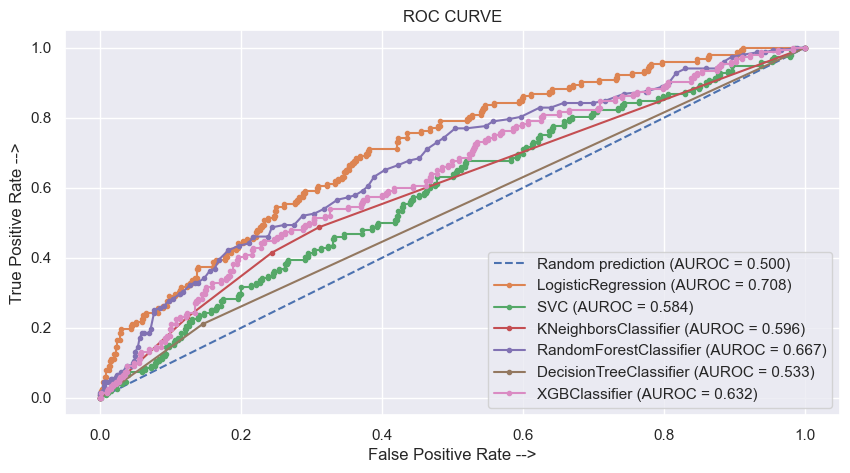

In [95]:
# Precision

#models = [Log_R,DT,RF,gnb,knn,svc_model]
models = [Log_R, svc_model, knn, RF, DT,XGB]
#models = [Log_R,knn,svc_model]
Common_Classification_metrics(X_train, X_test, y_train, y_test, models )


#########################################################
MODELS COMPAIRED :-

LogisticRegression(C=1)
SVC(C=44, probability=True)
KNeighborsClassifier(n_neighbors=3)
RandomForestClassifier(n_estimators=30)
DecisionTreeClassifier(max_depth=40)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
#######


----------------------###  Common_Classifiaction_Report  ###----------------------
Blue are highest
Red are Lowest


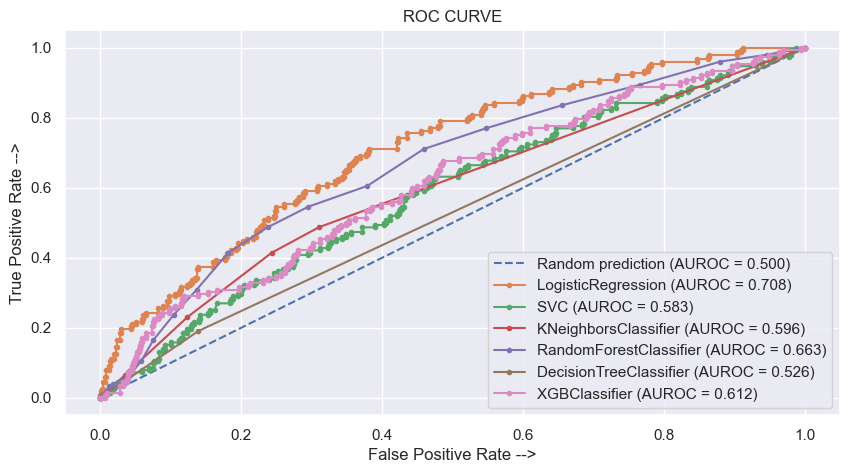

In [100]:
# recall

#models = [Log_R,DT,RF,gnb,knn,svc_model]
models = [Log_R, svc_model, knn, RF, DT,XGB]
#models = [Log_R,knn,svc_model]
Common_Classification_metrics(X_train, X_test, y_train, y_test, models )


In [215]:
# pickling the model
import pickle
pickle_out = open('CHD_RF_classifier.pkl', "wb")
pickle.dump(RF, pickle_out)
pickle_out.close()

In [216]:
import pickle

# loading in the model to predict on the data
pickle_in = open('CHD_RF_classifier.pkl', 'rb')
trained_model = pickle.load(pickle_in)

In [217]:
# pickling the model
import pickle
pickle_out = open('CHD_standardizer.pkl', "wb")
pickle.dump(sc_x, pickle_out)
pickle_out.close()

In [218]:
import pickle

# loading in the model to predict on the data
pickle_in = open('CHD_standardizer.pkl', 'rb')
standardizer = pickle.load(pickle_in)

# Conclusion

•	We have made significant progress in our machine learning project by training 6 different models on the training dataset. Each of these models has been refined through hyperparameter tuning to enhance its performance and achieve the best possible results. Our objective was to build accurate predictive models that can predict the cardiovascular heart disease in next 10 years based on the patient data.

•	After training and testing each of the models, we found that The Lowest false negatives (Type 2 errors ) are predicted by Logistic Regression model that is 53.

•	Highest precision score for class 0 is 0.32 which is given by Random forest classifier, but it have higher type 2 error.

•	Highest Recall score for class 0 is 0.365 which is given by Logistic regression model. And it have lowest type 2 error also.

•	Logistic regression have highest AUROC 0.708

•	So, we can say that based on the above metrics The logistic regression would be the best model for our use case.

•	Overall, our project has succeeded in developing and refining machine learning models that can make accurate predictions about cardiovascular heart disease risk prediction. These models can help doctors to get idea of heart disease for every individual patient.
